<a href="https://colab.research.google.com/github/CamiloVga/Curso-IA-Aplicada/blob/main/Script_Clase18_FundamentosNLP_y_Embedings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ü§ñ Inteligencia Artificial Aplicada para la Econom√≠a
## Universidad de los Andes

### üë®‚Äçüè´ Profesores
- **Profesor Magistral:** Camilo Vega Barbosa
- **Asistente de Docencia:** Sergio Julian Zona Moreno

### üìö Fundamentos NLP: Similitud Sem√°ntica entre Productos y Categor√≠as
Este notebook demuestra la implementaci√≥n pr√°ctica de conceptos fundamentales de Procesamiento de Lenguaje Natural (NLP):

1. **Tokenizaci√≥n ‚úÇÔ∏è**
   - Divisi√≥n del texto en unidades b√°sicas
   - Procesamiento a nivel de palabras
   - Manejo de t√©rminos compuestos

2. **Normalizaci√≥n üßπ**
   - Conversi√≥n a min√∫sculas
   - Lematizaci√≥n
   - Eliminaci√≥n de stopwords y puntuaci√≥n

3. **Vectorizaci√≥n üî¢**
   - Word Embeddings pre-entrenados
   - Representaci√≥n vectorial de palabras
   - Espacio sem√°ntico multidimensional

4. **Similitud de Coseno üìê**
   - C√°lculo matem√°tico paso a paso
   - Implementaci√≥n optimizada con NumPy
   - Interpretaci√≥n de resultados
   - Visualizaci√≥n de relaciones sem√°nticas

### üéØ Objetivo
Identificar relaciones sem√°nticas entre productos de supermercado y sus categor√≠as utilizando:
- Embeddings pre-entrenados de SpaCy
- C√°lculo de similitud de coseno
- Clasificaci√≥n autom√°tica basada en similitud sem√°ntica

### üîç Aplicaciones Pr√°cticas:
- Sistemas de b√∫squeda sem√°ntica en e-commerce
- Categorizaci√≥n autom√°tica de productos
- Recomendaciones basadas en similitud
- An√°lisis de mercado y agrupamiento

### Requisitos T√©cnicos:
- **Entorno de Ejecuci√≥n**: Google Colab o Jupyter Notebook
- **Bibliotecas Necesarias**:
  - spaCy (con modelo espa√±ol: es_core_news_md)
  - NumPy
  - scikit-learn
  - Matplotlib
  - Seaborn
- **Memoria RAM**: M√≠nimo 4GB recomendados
- **Tiempo Estimado**: 15-20 minutos para ejecuci√≥n completa



In [1]:
# Instalar las bibliotecas principales
!pip install spacy scikit-learn matplotlib seaborn numpy -q

# Descargar los modelos de lenguaje de spaCy para espa√±ol y alem√°n
!python -m spacy download es_core_news_md -q
!python -m spacy download en_core_news_md -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 22.2 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

‚úò No compatible package found for 'en_core_news_md' (spaCy v3.8.4)



üõí EJERCICIO DE SIMILITUD SEM√ÅNTICA: PRODUCTOS Y CATEGOR√çAS üõí
Este ejercicio demuestra el proceso completo de NLP:
1. Tokenizaci√≥n ‚úÇÔ∏è: Dividir el texto en unidades b√°sicas
2. Normalizaci√≥n üßπ: Estandarizar el texto (min√∫sculas, lematizaci√≥n)
3. Vectorizaci√≥n üî¢: Convertir texto en representaciones num√©ricas
4. Similitud de coseno üìè: Medir la similitud sem√°ntica entre palabras

Cargando modelo de lenguaje...
‚úì Modelo espa√±ol cargado

üß™ DEMOSTRACI√ìN: PALABRAS VS FRASES
Comparando similitudes:
  ‚Ä¢ 'tomate' con 'verdura': 0.7085
  ‚Ä¢ 'tomate' con 'fruta': 0.6227
  ‚Ä¢ 'tomate fresco' con 'verdura': 0.6958
  ‚Ä¢ 'tomate fresco' con 'fruta': 0.6650


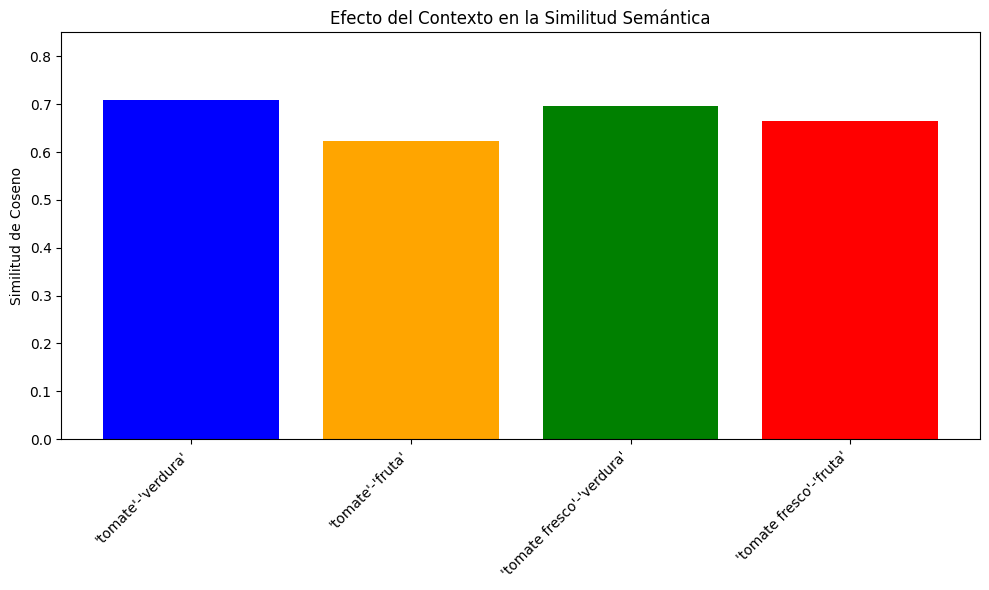


üí° CONCLUSI√ìN:
  Este ejemplo muestra c√≥mo SpaCy considera el contexto completo al generar vectores.
  La adici√≥n de 'fresco' modifica la representaci√≥n sem√°ntica del tomate,
  posiblemente acerc√°ndolo m√°s a la categor√≠a de verdura que de fruta.

üîÑ PROCESANDO PRODUCTOS

üîç Analizando: 'manzana'
  ‚úÇÔ∏è Tokenizaci√≥n:
    - Token: 'manzana'
  üßπ Normalizaci√≥n:
    - Original: 'manzana'
    - Min√∫sculas: 'manzana'
    - Lema: 'manzana'
  üî¢ Vectorizaci√≥n:
    - Dimensiones del vector: (300,)
    - Muestra del vector: [-0.58136   0.037496  0.66934   2.7966   -0.023352]...

üîç Analizando: 'detergente'
  ‚úÇÔ∏è Tokenizaci√≥n:
    - Token: 'detergente'
  üßπ Normalizaci√≥n:
    - Original: 'detergente'
    - Min√∫sculas: 'detergente'
    - Lema: 'detergente'
  üî¢ Vectorizaci√≥n:
    - Dimensiones del vector: (300,)
    - Muestra del vector: [ 1.5006    2.2125   -0.29781  -0.048466 -0.17367 ]...

üîç Analizando: 'pollo'
  ‚úÇÔ∏è Tokenizaci√≥n:
    - Token: 'pollo

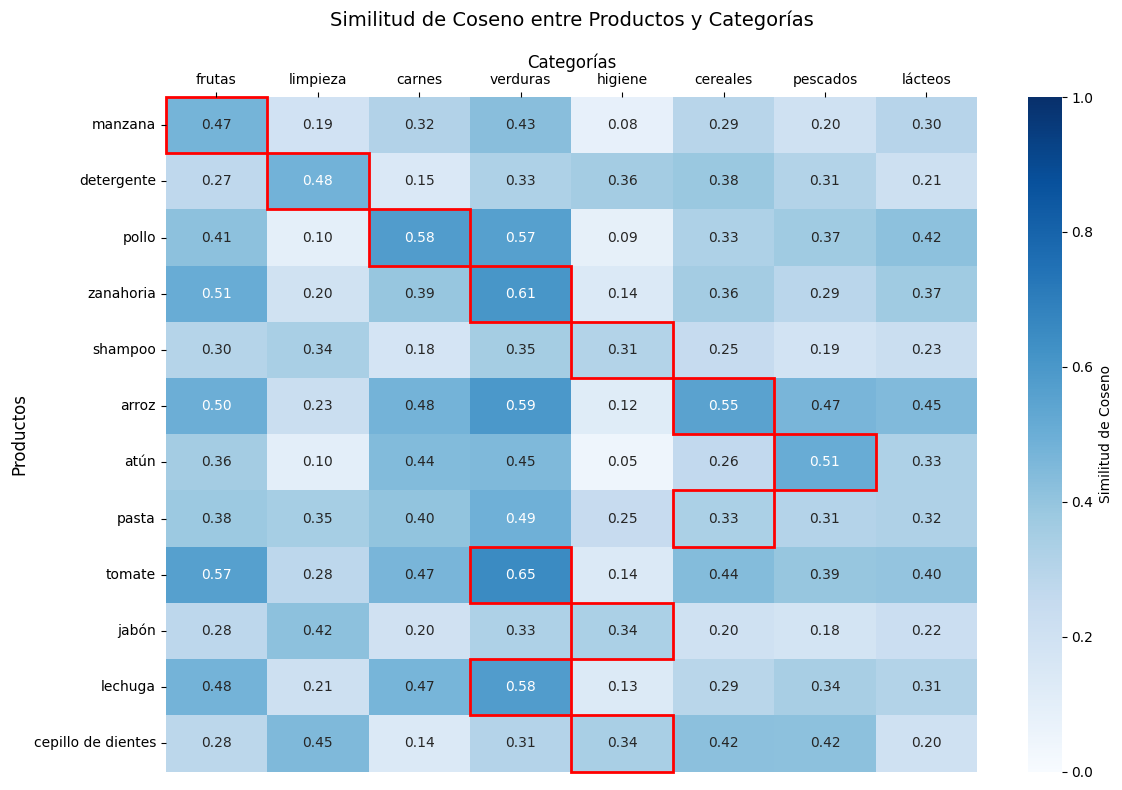


üèÜ MEJORES COINCIDENCIAS POR PRODUCTO
  'manzana' ‚Üí 'frutas' (similitud: 0.4743) ‚úÖ CORRECTO
    Interpretaci√≥n: Similitud sem√°ntica moderada
  'detergente' ‚Üí 'limpieza' (similitud: 0.4820) ‚úÖ CORRECTO
    Interpretaci√≥n: Similitud sem√°ntica moderada
  'pollo' ‚Üí 'carnes' (similitud: 0.5788) ‚úÖ CORRECTO
    Interpretaci√≥n: Similitud sem√°ntica moderada
  'zanahoria' ‚Üí 'verduras' (similitud: 0.6079) ‚úÖ CORRECTO
    Interpretaci√≥n: Similitud sem√°ntica moderada
  'shampoo' ‚Üí 'verduras' (similitud: 0.3522) ‚ùå INCORRECTO (deber√≠a ser 'higiene')
    Interpretaci√≥n: Baja similitud sem√°ntica
  'arroz' ‚Üí 'verduras' (similitud: 0.5938) ‚ùå INCORRECTO (deber√≠a ser 'cereales')
    Interpretaci√≥n: Similitud sem√°ntica moderada
  'at√∫n' ‚Üí 'pescados' (similitud: 0.5106) ‚úÖ CORRECTO
    Interpretaci√≥n: Similitud sem√°ntica moderada
  'pasta' ‚Üí 'verduras' (similitud: 0.4887) ‚ùå INCORRECTO (deber√≠a ser 'cereales')
    Interpretaci√≥n: Similitud sem√°ntica moderada

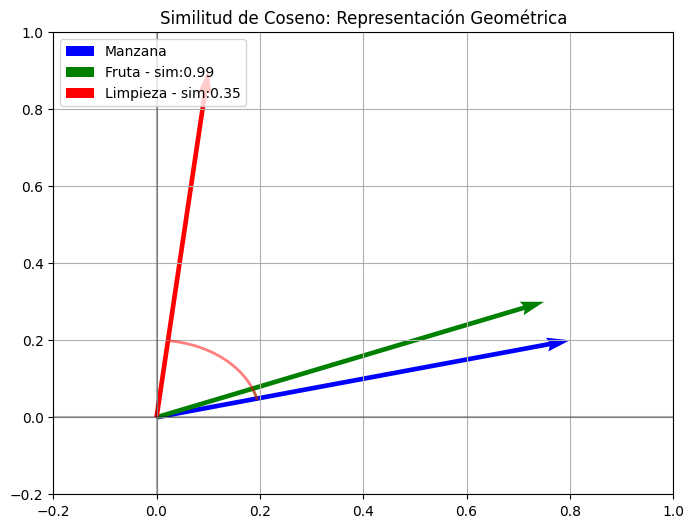


F√ìRMULA MATEM√ÅTICA:
  similitud_coseno(A, B) = (A¬∑B) / (|A| √ó |B|)
Donde:
  ‚Ä¢ A¬∑B es el producto punto de los vectores
  ‚Ä¢ |A| y |B| son las magnitudes (normas) de los vectores

Ejemplo num√©rico:
  ‚Ä¢ Producto punto de 'manzana' y 'fruta': 0.6600
  ‚Ä¢ Magnitud de 'manzana': 0.8246
  ‚Ä¢ Magnitud de 'fruta': 0.8078
  ‚Ä¢ Similitud de coseno: 0.9908

üí° CONCLUSI√ìN
Este ejercicio muestra c√≥mo los modelos de embeddings pueden identificar
relaciones sem√°nticas entre productos y sus categor√≠as dentro del mismo idioma.
Observaciones importantes:
1. La normalizaci√≥n mejora los resultados de similitud
2. Los embeddings capturan relaciones sem√°nticas incluso cuando no hay similitud l√©xica
3. El contexto (palabras adicionales) puede modificar significativamente la representaci√≥n
4. Estos conceptos son fundamentales en aplicaciones como:
   - Sistemas de b√∫squeda sem√°ntica
   - Categorizaci√≥n autom√°tica de productos
   - Recomendaciones basadas en similitud
   - An√°lisi

In [2]:
"""
EJERCICIO DE SIMILITUD SEM√ÅNTICA: PRODUCTOS Y CATEGOR√çAS DE SUPERMERCADO üõí

Este script demuestra el proceso completo de NLP comparando productos de supermercado
con sus posibles categor√≠as, mostrando c√≥mo los embeddings capturan relaciones sem√°nticas
entre palabras del mismo idioma.
"""

# ====================== IMPORTACI√ìN DE BIBLIOTECAS ======================
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# ====================== DEFINICI√ìN DE FUNCIONES ======================

def procesar_palabra(palabra, nlp, mostrar_detalles=True):
    """
    Realiza el proceso completo de NLP en una palabra:
    1. Tokenizaci√≥n ‚úÇÔ∏è
    2. Normalizaci√≥n üßπ
    3. Vectorizaci√≥n üî¢
    """
    # PASO 1: TOKENIZACI√ìN ‚úÇÔ∏è
    # Procesamos la palabra con SpaCy
    doc = nlp(palabra.lower())  # Convertimos a min√∫sculas para mejorar resultados

    if mostrar_detalles:
        print(f"\nüîç Analizando: '{palabra}'")

        # Mostramos los tokens
        print(f"  ‚úÇÔ∏è Tokenizaci√≥n:")
        for token in doc:
            print(f"    - Token: '{token.text}'")

        # PASO 2: NORMALIZACI√ìN üßπ
        print(f"  üßπ Normalizaci√≥n:")
        for token in doc:
            print(f"    - Original: '{token.text}'")
            print(f"    - Min√∫sculas: '{token.text.lower()}'")
            print(f"    - Lema: '{token.lemma_}'")

        # PASO 3: VECTORIZACI√ìN üî¢
        print(f"  üî¢ Vectorizaci√≥n:")
        print(f"    - Dimensiones del vector: {doc.vector.shape}")

        # Mostramos una peque√±a muestra del vector
        print(f"    - Muestra del vector: {doc.vector[:5]}...")

    # Devolvemos el vector y el documento procesado
    return doc.vector, doc

def calcular_similitud_productos_categorias(productos, categorias, clasificacion, nlp):
    """
    Calcula y visualiza la matriz de similitud entre productos y categor√≠as.

    Args:
        productos: Lista de productos
        categorias: Lista de categor√≠as
        clasificacion: Diccionario que asigna cada producto a su categor√≠a correcta
        nlp: Modelo de spaCy cargado
    """
    # Matrices para almacenar vectores y similitudes
    vectores_productos = []
    vectores_categorias = []
    matriz_similitud = np.zeros((len(productos), len(categorias)))

    # Procesamos cada producto
    print("\nüîÑ PROCESANDO PRODUCTOS")
    for producto in productos:
        vector, _ = procesar_palabra(producto, nlp, mostrar_detalles=True)
        vectores_productos.append(vector)

    # Procesamos cada categor√≠a
    print("\nüîÑ PROCESANDO CATEGOR√çAS")
    for categoria in categorias:
        vector, _ = procesar_palabra(categoria, nlp, mostrar_detalles=True)
        vectores_categorias.append(vector)

    # Calculamos la similitud de coseno entre cada producto y categor√≠a
    print("\nüìä CALCULANDO MATRIZ DE SIMILITUD")
    for i, vec_producto in enumerate(vectores_productos):
        for j, vec_categoria in enumerate(vectores_categorias):
            # Preparamos los vectores para calcular similitud de coseno
            vec_producto_reshaped = vec_producto.reshape(1, -1)
            vec_categoria_reshaped = vec_categoria.reshape(1, -1)

            # F√ìRMULA DE SIMILITUD DE COSENO: cos(Œ∏) = (A¬∑B)/(|A|¬∑|B|)
            sim = cosine_similarity(vec_producto_reshaped, vec_categoria_reshaped)[0][0]
            matriz_similitud[i, j] = sim

            # Destacamos si es la categor√≠a correcta
            es_categoria_correcta = categorias[j] == clasificacion[productos[i]]
            destacado = "‚úì" if es_categoria_correcta else ""

            print(f"  Similitud entre '{productos[i]}' y '{categorias[j]}': {sim:.4f} {destacado}")

    # Visualizamos la matriz de similitud
    visualizar_matriz_similitud(productos, categorias, matriz_similitud, clasificacion)

    # Encontramos las mejores coincidencias
    encontrar_mejores_coincidencias(productos, categorias, matriz_similitud, clasificacion)

    return matriz_similitud

def visualizar_matriz_similitud(productos, categorias, matriz_similitud, clasificacion):
    """
    Visualiza la matriz de similitud entre productos y categor√≠as como un mapa de calor.
    """
    plt.figure(figsize=(12, 8))

    # Creamos el mapa de calor con etiquetas arriba
    ax = sns.heatmap(
        matriz_similitud,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=categorias,
        yticklabels=productos,
        vmin=0,
        vmax=1,
        cbar_kws={'label': 'Similitud de Coseno'}
    )

    # Colocamos las etiquetas de columnas (categor√≠as) en la parte superior
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # A√±adimos un marcador para las categor√≠as correctas
    # Creamos un diccionario inverso para encontrar √≠ndices
    indices_cat = {cat: i for i, cat in enumerate(categorias)}

    for i, producto in enumerate(productos):
        categoria_correcta = clasificacion[producto]
        j = indices_cat[categoria_correcta]

        # Dibujamos un rect√°ngulo alrededor de la categor√≠a correcta
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False,
                                 edgecolor='red', lw=2, clip_on=False))

    plt.title("Similitud de Coseno entre Productos y Categor√≠as", fontsize=14, pad=20)
    plt.xlabel("Categor√≠as", fontsize=12)
    plt.ylabel("Productos", fontsize=12)
    plt.tight_layout()
    plt.show()

def encontrar_mejores_coincidencias(productos, categorias, matriz_similitud, clasificacion):
    """
    Encuentra y muestra las mejores coincidencias entre productos y categor√≠as.
    """
    print("\nüèÜ MEJORES COINCIDENCIAS POR PRODUCTO")

    # Contamos cu√°ntas veces acertamos la categor√≠a correcta
    aciertos = 0

    for i, producto in enumerate(productos):
        # Encontramos la categor√≠a con mayor similitud
        mejor_indice = np.argmax(matriz_similitud[i])
        mejor_similitud = matriz_similitud[i, mejor_indice]
        mejor_categoria = categorias[mejor_indice]

        # Verificamos si es la categor√≠a correcta
        categoria_correcta = clasificacion[producto]
        es_correcta = mejor_categoria == categoria_correcta

        if es_correcta:
            aciertos += 1
            resultado = "‚úÖ CORRECTO"
        else:
            resultado = f"‚ùå INCORRECTO (deber√≠a ser '{categoria_correcta}')"

        print(f"  '{producto}' ‚Üí '{mejor_categoria}' (similitud: {mejor_similitud:.4f}) {resultado}")

        # Interpretamos la similitud
        if mejor_similitud > 0.7:
            interpretacion = "Alta similitud sem√°ntica"
        elif mejor_similitud > 0.4:
            interpretacion = "Similitud sem√°ntica moderada"
        elif mejor_similitud > 0.2:
            interpretacion = "Baja similitud sem√°ntica"
        else:
            interpretacion = "Similitud muy baja o nula"

        print(f"    Interpretaci√≥n: {interpretacion}")

    # Mostramos la precisi√≥n general del modelo
    precision = aciertos / len(productos) * 100
    print(f"\nüìà Precisi√≥n del modelo: {precision:.1f}% ({aciertos}/{len(productos)} aciertos)")

def demostrar_frases_vs_palabras(nlp):
    """
    Demuestra c√≥mo los vectores de frases difieren de los vectores de palabras individuales.
    """
    print("\nüß™ DEMOSTRACI√ìN: PALABRAS VS FRASES")

    # Definimos nuestras palabras y frases
    palabra = "tomate"
    frase = "tomate fresco"
    categoria1 = "verdura"
    categoria2 = "fruta"

    # Procesamos con SpaCy
    vec_palabra = nlp(palabra.lower()).vector
    vec_frase = nlp(frase.lower()).vector
    vec_cat1 = nlp(categoria1.lower()).vector
    vec_cat2 = nlp(categoria2.lower()).vector

    # Calculamos similitudes
    sim_palabra_cat1 = cosine_similarity(vec_palabra.reshape(1, -1), vec_cat1.reshape(1, -1))[0][0]
    sim_palabra_cat2 = cosine_similarity(vec_palabra.reshape(1, -1), vec_cat2.reshape(1, -1))[0][0]
    sim_frase_cat1 = cosine_similarity(vec_frase.reshape(1, -1), vec_cat1.reshape(1, -1))[0][0]
    sim_frase_cat2 = cosine_similarity(vec_frase.reshape(1, -1), vec_cat2.reshape(1, -1))[0][0]

    print(f"Comparando similitudes:")
    print(f"  ‚Ä¢ '{palabra}' con '{categoria1}': {sim_palabra_cat1:.4f}")
    print(f"  ‚Ä¢ '{palabra}' con '{categoria2}': {sim_palabra_cat2:.4f}")
    print(f"  ‚Ä¢ '{frase}' con '{categoria1}': {sim_frase_cat1:.4f}")
    print(f"  ‚Ä¢ '{frase}' con '{categoria2}': {sim_frase_cat2:.4f}")

    # Visualizamos las diferencias
    labels = [f"'{palabra}'-'{categoria1}'", f"'{palabra}'-'{categoria2}'",
              f"'{frase}'-'{categoria1}'", f"'{frase}'-'{categoria2}'"]
    valores = [sim_palabra_cat1, sim_palabra_cat2, sim_frase_cat1, sim_frase_cat2]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, valores, color=['blue', 'orange', 'green', 'red'])
    plt.ylim(0, max(valores) * 1.2)
    plt.title("Efecto del Contexto en la Similitud Sem√°ntica")
    plt.ylabel("Similitud de Coseno")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\nüí° CONCLUSI√ìN:")
    print("  Este ejemplo muestra c√≥mo SpaCy considera el contexto completo al generar vectores.")
    print("  La adici√≥n de 'fresco' modifica la representaci√≥n sem√°ntica del tomate,")
    print("  posiblemente acerc√°ndolo m√°s a la categor√≠a de verdura que de fruta.")

def explicar_similitud_coseno():
    """
    Explica el concepto de similitud de coseno con una visualizaci√≥n simple.
    """
    print("\nüìê EXPLICACI√ìN: SIMILITUD DE COSENO")
    print("La similitud de coseno mide el √°ngulo entre dos vectores:")
    print("  ‚Ä¢ Similitud = 1: Los vectores apuntan en la misma direcci√≥n (conceptos id√©nticos)")
    print("  ‚Ä¢ Similitud = 0: Los vectores son perpendiculares (conceptos no relacionados)")
    print("  ‚Ä¢ Similitud = -1: Los vectores apuntan en direcciones opuestas (raramente ocurre)")

    # Crear visualizaci√≥n de tres vectores
    plt.figure(figsize=(8, 6))

    # Definir vectores
    origen = [0, 0]
    vec1 = [0.8, 0.2]  # Manzana
    vec2 = [0.75, 0.3]  # Fruta (similar)
    vec3 = [0.1, 0.9]  # Vector no relacionado (limpieza)

    # Calcular similitudes
    sim_12 = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    sim_13 = np.dot(vec1, vec3) / (np.linalg.norm(vec1) * np.linalg.norm(vec3))

    # Dibujar vectores
    plt.quiver(*origen, *vec1, scale=1, scale_units='xy', angles='xy', color='blue', label=f'Manzana')
    plt.quiver(*origen, *vec2, scale=1, scale_units='xy', angles='xy', color='green', label=f'Fruta - sim:{sim_12:.2f}')
    plt.quiver(*origen, *vec3, scale=1, scale_units='xy', angles='xy', color='red', label=f'Limpieza - sim:{sim_13:.2f}')

    # Configurar gr√°fico
    plt.xlim(-0.2, 1.0)
    plt.ylim(-0.2, 1.0)
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend(loc='upper left')
    plt.title('Similitud de Coseno: Representaci√≥n Geom√©trica')

    # A√±adir arco para mostrar el √°ngulo entre vectores
    radio = 0.2
    angulo1 = np.arctan2(vec1[1], vec1[0])
    angulo2 = np.arctan2(vec2[1], vec2[0])
    angulo3 = np.arctan2(vec3[1], vec3[0])

    # Dibujar arcos para mostrar √°ngulos
    t1 = np.linspace(angulo1, angulo2, 100)
    plt.plot(radio * np.cos(t1), radio * np.sin(t1), 'g-', lw=2, alpha=0.5)
    t2 = np.linspace(angulo1, angulo3, 100)
    plt.plot(radio * np.cos(t2), radio * np.sin(t2), 'r-', lw=2, alpha=0.5)

    plt.show()

    # Explicaci√≥n matem√°tica
    print("\nF√ìRMULA MATEM√ÅTICA:")
    print("  similitud_coseno(A, B) = (A¬∑B) / (|A| √ó |B|)")
    print("Donde:")
    print("  ‚Ä¢ A¬∑B es el producto punto de los vectores")
    print("  ‚Ä¢ |A| y |B| son las magnitudes (normas) de los vectores")
    print("\nEjemplo num√©rico:")
    print(f"  ‚Ä¢ Producto punto de 'manzana' y 'fruta': {vec1[0]*vec2[0] + vec1[1]*vec2[1]:.4f}")
    print(f"  ‚Ä¢ Magnitud de 'manzana': {np.linalg.norm(vec1):.4f}")
    print(f"  ‚Ä¢ Magnitud de 'fruta': {np.linalg.norm(vec2):.4f}")
    print(f"  ‚Ä¢ Similitud de coseno: {sim_12:.4f}")

# ====================== FUNCI√ìN PRINCIPAL ======================

def main():
    """Funci√≥n principal del programa."""
    print("üõí EJERCICIO DE SIMILITUD SEM√ÅNTICA: PRODUCTOS Y CATEGOR√çAS üõí")
    print("="*80)
    print("Este ejercicio demuestra el proceso completo de NLP:")
    print("1. Tokenizaci√≥n ‚úÇÔ∏è: Dividir el texto en unidades b√°sicas")
    print("2. Normalizaci√≥n üßπ: Estandarizar el texto (min√∫sculas, lematizaci√≥n)")
    print("3. Vectorizaci√≥n üî¢: Convertir texto en representaciones num√©ricas")
    print("4. Similitud de coseno üìè: Medir la similitud sem√°ntica entre palabras")
    print("="*80)

    # Definimos productos y categor√≠as de supermercado
    productos = [
        "manzana", "detergente", "pollo", "zanahoria",
        "shampoo", "arroz", "at√∫n", "pasta", "tomate",
        "jab√≥n", "lechuga", "cepillo de dientes"
    ]

    categorias = [
        "frutas", "limpieza", "carnes", "verduras",
        "higiene", "cereales", "pescados", "l√°cteos"
    ]

    # Clasificaci√≥n correcta de productos (para evaluaci√≥n)
    clasificacion = {
        "manzana": "frutas",
        "detergente": "limpieza",
        "pollo": "carnes",
        "zanahoria": "verduras",
        "shampoo": "higiene",
        "arroz": "cereales",
        "at√∫n": "pescados",
        "pasta": "cereales",
        "tomate": "verduras",
        "jab√≥n": "higiene",
        "lechuga": "verduras",
        "cepillo de dientes": "higiene"
    }

    # Cargamos el modelo de lenguaje de spaCy
    print("\nCargando modelo de lenguaje...")
    try:
        nlp = spacy.load("es_core_news_md")
        print("‚úì Modelo espa√±ol cargado")
    except OSError:
        print("! Modelo espa√±ol no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "es_core_news_md"])
        nlp = spacy.load("es_core_news_md")

    # Demostramos las diferencias entre vectores de palabras y frases
    demostrar_frases_vs_palabras(nlp)

    # Calculamos la similitud entre productos y categor√≠as
    matriz_similitud = calcular_similitud_productos_categorias(
        productos,
        categorias,
        clasificacion,
        nlp
    )

    # Explicamos la similitud de coseno
    explicar_similitud_coseno()

    print("\nüí° CONCLUSI√ìN")
    print("Este ejercicio muestra c√≥mo los modelos de embeddings pueden identificar")
    print("relaciones sem√°nticas entre productos y sus categor√≠as dentro del mismo idioma.")
    print("Observaciones importantes:")
    print("1. La normalizaci√≥n mejora los resultados de similitud")
    print("2. Los embeddings capturan relaciones sem√°nticas incluso cuando no hay similitud l√©xica")
    print("3. El contexto (palabras adicionales) puede modificar significativamente la representaci√≥n")
    print("4. Estos conceptos son fundamentales en aplicaciones como:")
    print("   - Sistemas de b√∫squeda sem√°ntica")
    print("   - Categorizaci√≥n autom√°tica de productos")
    print("   - Recomendaciones basadas en similitud")
    print("   - An√°lisis de mercado y agrupamiento")

# ====================== EJECUCI√ìN DEL PROGRAMA ======================

if __name__ == "__main__":
    main()

üõí EJERCICIO DE SIMILITUD SEM√ÅNTICA: PRODUCTOS DE SUPERMERCADO üõí
Este ejercicio demuestra el proceso completo de NLP:
1. Tokenizaci√≥n ‚úÇÔ∏è: Dividir el texto en unidades b√°sicas
2. Normalizaci√≥n üßπ: Estandarizar el texto (min√∫sculas, lematizaci√≥n)
3. Vectorizaci√≥n üî¢: Convertir texto en representaciones num√©ricas
4. Similitud de coseno üìè: Medir la similitud sem√°ntica entre palabras en diferentes idiomas

Cargando modelos de lenguaje...
‚úì Modelo espa√±ol cargado
! Modelo ingl√©s no encontrado. Instalando...

üß™ DEMOSTRACI√ìN: IMPORTANCIA DE LA NORMALIZACI√ìN
Comparando 'Pan' con 'Bread':
  ‚Ä¢ Similitud SIN normalizaci√≥n: -0.0277
  ‚Ä¢ Similitud CON normalizaci√≥n: -0.0395
  ‚Ä¢ Mejora: -0.0119 (-42.9%)

üîÑ PROCESANDO PRODUCTOS EN ESPA√ëOL

üîç Analizando: 'pan'
  ‚úÇÔ∏è Tokenizaci√≥n:
    - Token: 'pan'
  üßπ Normalizaci√≥n:
    - Original: 'pan'
    - Min√∫sculas: 'pan'
    - Lema: 'pan'
  üî¢ Vectorizaci√≥n:
    - Dimensiones del vector: (300,)
    - M

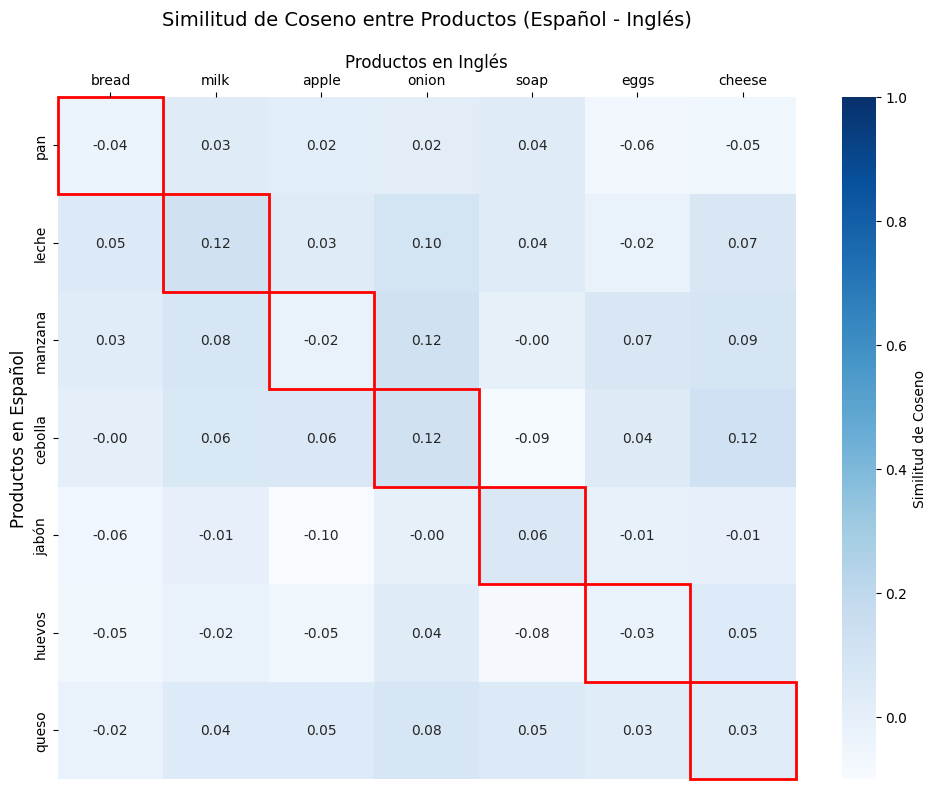


üèÜ MEJORES COINCIDENCIAS POR PRODUCTO
  'pan' ‚Üí 'soap' (similitud: 0.0374) ‚ùå INCORRECTO (deber√≠a ser 'bread')
    Interpretaci√≥n: Similitud muy baja o nula
  'leche' ‚Üí 'milk' (similitud: 0.1158) ‚úÖ CORRECTO
    Interpretaci√≥n: Similitud muy baja o nula
  'manzana' ‚Üí 'onion' (similitud: 0.1210) ‚ùå INCORRECTO (deber√≠a ser 'apple')
    Interpretaci√≥n: Similitud muy baja o nula
  'cebolla' ‚Üí 'cheese' (similitud: 0.1242) ‚ùå INCORRECTO (deber√≠a ser 'onion')
    Interpretaci√≥n: Similitud muy baja o nula
  'jab√≥n' ‚Üí 'soap' (similitud: 0.0632) ‚úÖ CORRECTO
    Interpretaci√≥n: Similitud muy baja o nula
  'huevos' ‚Üí 'cheese' (similitud: 0.0450) ‚ùå INCORRECTO (deber√≠a ser 'eggs')
    Interpretaci√≥n: Similitud muy baja o nula
  'queso' ‚Üí 'onion' (similitud: 0.0807) ‚ùå INCORRECTO (deber√≠a ser 'cheese')
    Interpretaci√≥n: Similitud muy baja o nula

üìà Precisi√≥n del modelo: 28.6% (2/7 aciertos)

üìê EXPLICACI√ìN: SIMILITUD DE COSENO
La similitud de coseno mide

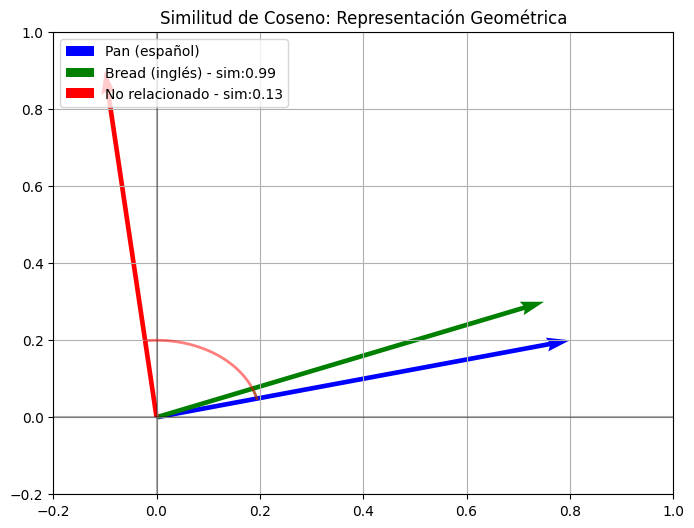


F√ìRMULA MATEM√ÅTICA:
  similitud_coseno(A, B) = (A¬∑B) / (|A| √ó |B|)
Donde:
  ‚Ä¢ A¬∑B es el producto punto de los vectores
  ‚Ä¢ |A| y |B| son las magnitudes (normas) de los vectores

Ejemplo num√©rico:
  ‚Ä¢ Producto punto de 'pan' y 'bread': 0.6600
  ‚Ä¢ Magnitud de 'pan': 0.8246
  ‚Ä¢ Magnitud de 'bread': 0.8078
  ‚Ä¢ Similitud de coseno: 0.9908

üí° CONCLUSI√ìN
Este ejercicio muestra c√≥mo los modelos de embeddings pueden identificar
equivalencias sem√°nticas entre palabras de diferentes idiomas.
Observaciones importantes:
1. La normalizaci√≥n (convertir a min√∫sculas, lematizaci√≥n) mejora los resultados
2. Los embeddings capturan similitudes sem√°nticas entre idiomas diferentes
3. La similitud de coseno proporciona una medida num√©rica de relaci√≥n sem√°ntica
4. Estos conceptos son fundamentales en aplicaciones como:
   - B√∫squeda multiling√ºe
   - Sistemas de recomendaci√≥n
   - Traducci√≥n autom√°tica
   - Asistentes virtuales


In [3]:
"""
EJERCICIO DE SIMILITUD SEM√ÅNTICA MULTILING√úE: PRODUCTOS DE SUPERMERCADO üõí

Este script demuestra el proceso completo de NLP comparando productos de supermercado
en espa√±ol e ingl√©s, mostrando c√≥mo los embeddings capturan similitudes sem√°nticas
a trav√©s de diferentes idiomas.
"""

# ====================== IMPORTACI√ìN DE BIBLIOTECAS ======================
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# ====================== DEFINICI√ìN DE FUNCIONES ======================

def procesar_palabra(palabra, nlp, mostrar_detalles=True):
    """
    Realiza el proceso completo de NLP en una palabra:
    1. Tokenizaci√≥n ‚úÇÔ∏è
    2. Normalizaci√≥n üßπ
    3. Vectorizaci√≥n üî¢
    """
    # PASO 1: TOKENIZACI√ìN ‚úÇÔ∏è
    # Procesamos la palabra con SpaCy
    doc = nlp(palabra.lower())  # Convertimos a min√∫sculas para mejorar resultados

    if mostrar_detalles:
        print(f"\nüîç Analizando: '{palabra}'")

        # Mostramos los tokens
        print(f"  ‚úÇÔ∏è Tokenizaci√≥n:")
        for token in doc:
            print(f"    - Token: '{token.text}'")

        # PASO 2: NORMALIZACI√ìN üßπ
        print(f"  üßπ Normalizaci√≥n:")
        for token in doc:
            print(f"    - Original: '{token.text}'")
            print(f"    - Min√∫sculas: '{token.text.lower()}'")
            print(f"    - Lema: '{token.lemma_}'")

        # PASO 3: VECTORIZACI√ìN üî¢
        print(f"  üî¢ Vectorizaci√≥n:")
        print(f"    - Dimensiones del vector: {doc.vector.shape}")

        # Mostramos una peque√±a muestra del vector
        print(f"    - Muestra del vector: {doc.vector[:5]}...")

    # Devolvemos el vector y el documento procesado
    return doc.vector, doc

def calcular_similitud_productos(productos_es, productos_en, traducciones, nlp_es, nlp_en):
    """
    Calcula y visualiza la matriz de similitud entre productos en espa√±ol e ingl√©s.

    Args:
        productos_es: Lista de productos en espa√±ol
        productos_en: Lista de productos en ingl√©s
        traducciones: Diccionario con las traducciones correctas
        nlp_es: Modelo de spaCy para espa√±ol
        nlp_en: Modelo de spaCy para ingl√©s
    """
    # Matrices para almacenar vectores y similitudes
    vectores_es = []
    vectores_en = []
    matriz_similitud = np.zeros((len(productos_es), len(productos_en)))

    # Procesamos cada producto en espa√±ol
    print("\nüîÑ PROCESANDO PRODUCTOS EN ESPA√ëOL")
    for producto in productos_es:
        vector, _ = procesar_palabra(producto, nlp_es, mostrar_detalles=True)
        vectores_es.append(vector)

    # Procesamos cada producto en ingl√©s
    print("\nüîÑ PROCESANDO PRODUCTOS EN INGL√âS")
    for producto in productos_en:
        vector, _ = procesar_palabra(producto, nlp_en, mostrar_detalles=True)
        vectores_en.append(vector)

    # Calculamos la similitud de coseno entre cada par de productos
    print("\nüìä CALCULANDO MATRIZ DE SIMILITUD")
    for i, vec_es in enumerate(vectores_es):
        for j, vec_en in enumerate(vectores_en):
            # Preparamos los vectores para calcular similitud de coseno
            vec_es_reshaped = vec_es.reshape(1, -1)
            vec_en_reshaped = vec_en.reshape(1, -1)

            # F√ìRMULA DE SIMILITUD DE COSENO: cos(Œ∏) = (A¬∑B)/(|A|¬∑|B|)
            sim = cosine_similarity(vec_es_reshaped, vec_en_reshaped)[0][0]
            matriz_similitud[i, j] = sim

            # Destacamos si es la traducci√≥n correcta
            es_traduccion = productos_en[j] == traducciones[productos_es[i]]
            destacado = "‚úì" if es_traduccion else ""

            print(f"  Similitud entre '{productos_es[i]}' y '{productos_en[j]}': {sim:.4f} {destacado}")

    # Visualizamos la matriz de similitud
    visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones)

    # Encontramos las mejores coincidencias
    encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones)

    return matriz_similitud

def visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Visualiza la matriz de similitud entre productos como un mapa de calor.
    """
    plt.figure(figsize=(10, 8))

    # Creamos el mapa de calor con etiquetas arriba
    ax = sns.heatmap(
        matriz_similitud,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=productos_en,
        yticklabels=productos_es,
        vmin=-0.1,
        vmax=1,
        cbar_kws={'label': 'Similitud de Coseno'}
    )

    # Colocamos las etiquetas de columnas (productos ingleses) en la parte superior
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # A√±adimos un marcador para las traducciones correctas
    # Creamos un diccionario inverso para encontrar √≠ndices
    indices_en = {prod: i for i, prod in enumerate(productos_en)}

    for i, prod_es in enumerate(productos_es):
        traduccion = traducciones[prod_es]
        j = indices_en[traduccion]

        # Dibujamos un rect√°ngulo alrededor de la traducci√≥n correcta
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False,
                                 edgecolor='red', lw=2, clip_on=False))

    plt.title("Similitud de Coseno entre Productos (Espa√±ol - Ingl√©s)", fontsize=14, pad=20)
    plt.xlabel("Productos en Ingl√©s", fontsize=12)
    plt.ylabel("Productos en Espa√±ol", fontsize=12)
    plt.tight_layout()
    plt.show()

def encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Encuentra y muestra las mejores coincidencias entre productos.
    """
    print("\nüèÜ MEJORES COINCIDENCIAS POR PRODUCTO")

    # Contamos cu√°ntas veces acertamos la traducci√≥n correcta
    aciertos = 0

    for i, producto_es in enumerate(productos_es):
        # Encontramos el producto ingl√©s con mayor similitud
        mejor_indice = np.argmax(matriz_similitud[i])
        mejor_similitud = matriz_similitud[i, mejor_indice]
        mejor_producto_en = productos_en[mejor_indice]

        # Verificamos si es la traducci√≥n correcta
        traduccion_correcta = traducciones[producto_es]
        es_correcta = mejor_producto_en == traduccion_correcta

        if es_correcta:
            aciertos += 1
            resultado = "‚úÖ CORRECTO"
        else:
            resultado = f"‚ùå INCORRECTO (deber√≠a ser '{traduccion_correcta}')"

        print(f"  '{producto_es}' ‚Üí '{mejor_producto_en}' (similitud: {mejor_similitud:.4f}) {resultado}")

        # Interpretamos la similitud
        if mejor_similitud > 0.7:
            interpretacion = "Alta similitud sem√°ntica"
        elif mejor_similitud > 0.4:
            interpretacion = "Similitud sem√°ntica moderada"
        elif mejor_similitud > 0.2:
            interpretacion = "Baja similitud sem√°ntica"
        else:
            interpretacion = "Similitud muy baja o nula"

        print(f"    Interpretaci√≥n: {interpretacion}")

    # Mostramos la precisi√≥n general del modelo
    precision = aciertos / len(productos_es) * 100
    print(f"\nüìà Precisi√≥n del modelo: {precision:.1f}% ({aciertos}/{len(productos_es)} aciertos)")

def demostrar_mejora_normalizacion(palabra_es, palabra_en, nlp_es, nlp_en):
    """
    Demuestra la importancia de la normalizaci√≥n comparando similitudes.
    """
    print("\nüß™ DEMOSTRACI√ìN: IMPORTANCIA DE LA NORMALIZACI√ìN")

    # Sin normalizaci√≥n
    doc_es_orig = nlp_es(palabra_es)
    doc_en_orig = nlp_en(palabra_en)

    # Con normalizaci√≥n (min√∫sculas)
    doc_es_norm = nlp_es(palabra_es.lower())
    doc_en_norm = nlp_en(palabra_en.lower())

    # Calculamos similitudes
    sim_orig = cosine_similarity(
        doc_es_orig.vector.reshape(1, -1),
        doc_en_orig.vector.reshape(1, -1)
    )[0][0]

    sim_norm = cosine_similarity(
        doc_es_norm.vector.reshape(1, -1),
        doc_en_norm.vector.reshape(1, -1)
    )[0][0]

    print(f"Comparando '{palabra_es}' con '{palabra_en}':")
    print(f"  ‚Ä¢ Similitud SIN normalizaci√≥n: {sim_orig:.4f}")
    print(f"  ‚Ä¢ Similitud CON normalizaci√≥n: {sim_norm:.4f}")
    print(f"  ‚Ä¢ Mejora: {(sim_norm - sim_orig):.4f} ({(sim_norm - sim_orig) / max(0.0001, abs(sim_orig)) * 100:.1f}%)")

def explicar_similitud_coseno():
    """
    Explica el concepto de similitud de coseno con una visualizaci√≥n simple.
    """
    print("\nüìê EXPLICACI√ìN: SIMILITUD DE COSENO")
    print("La similitud de coseno mide el √°ngulo entre dos vectores:")
    print("  ‚Ä¢ Similitud = 1: Los vectores apuntan en la misma direcci√≥n (productos id√©nticos)")
    print("  ‚Ä¢ Similitud = 0: Los vectores son perpendiculares (productos no relacionados)")
    print("  ‚Ä¢ Similitud = -1: Los vectores apuntan en direcciones opuestas (raramente ocurre)")

    # Crear visualizaci√≥n de tres vectores
    plt.figure(figsize=(8, 6))

    # Definir vectores
    origen = [0, 0]
    vec1 = [0.8, 0.2]  # Pan en espa√±ol
    vec2 = [0.75, 0.3]  # Bread en ingl√©s (similar)
    vec3 = [-0.1, 0.9]  # Vector muy diferente

    # Calcular similitudes
    sim_12 = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    sim_13 = np.dot(vec1, vec3) / (np.linalg.norm(vec1) * np.linalg.norm(vec3))

    # Dibujar vectores
    plt.quiver(*origen, *vec1, scale=1, scale_units='xy', angles='xy', color='blue', label=f'Pan (espa√±ol)')
    plt.quiver(*origen, *vec2, scale=1, scale_units='xy', angles='xy', color='green', label=f'Bread (ingl√©s) - sim:{sim_12:.2f}')
    plt.quiver(*origen, *vec3, scale=1, scale_units='xy', angles='xy', color='red', label=f'No relacionado - sim:{sim_13:.2f}')

    # Configurar gr√°fico
    plt.xlim(-0.2, 1.0)
    plt.ylim(-0.2, 1.0)
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend(loc='upper left')
    plt.title('Similitud de Coseno: Representaci√≥n Geom√©trica')

    # A√±adir arco para mostrar el √°ngulo entre vec1 y vec2
    radio = 0.2
    angulo1 = np.arctan2(vec1[1], vec1[0])
    angulo2 = np.arctan2(vec2[1], vec2[0])
    angulo3 = np.arctan2(vec3[1], vec3[0])

    # Dibujar arcos para mostrar √°ngulos
    t1 = np.linspace(angulo1, angulo2, 100)
    plt.plot(radio * np.cos(t1), radio * np.sin(t1), 'g-', lw=2, alpha=0.5)
    t2 = np.linspace(angulo1, angulo3, 100)
    plt.plot(radio * np.cos(t2), radio * np.sin(t2), 'r-', lw=2, alpha=0.5)

    plt.show()

    # Explicaci√≥n matem√°tica
    print("\nF√ìRMULA MATEM√ÅTICA:")
    print("  similitud_coseno(A, B) = (A¬∑B) / (|A| √ó |B|)")
    print("Donde:")
    print("  ‚Ä¢ A¬∑B es el producto punto de los vectores")
    print("  ‚Ä¢ |A| y |B| son las magnitudes (normas) de los vectores")
    print("\nEjemplo num√©rico:")
    print(f"  ‚Ä¢ Producto punto de 'pan' y 'bread': {vec1[0]*vec2[0] + vec1[1]*vec2[1]:.4f}")
    print(f"  ‚Ä¢ Magnitud de 'pan': {np.linalg.norm(vec1):.4f}")
    print(f"  ‚Ä¢ Magnitud de 'bread': {np.linalg.norm(vec2):.4f}")
    print(f"  ‚Ä¢ Similitud de coseno: {sim_12:.4f}")

# ====================== FUNCI√ìN PRINCIPAL ======================

def main():
    """Funci√≥n principal del programa."""
    print("üõí EJERCICIO DE SIMILITUD SEM√ÅNTICA: PRODUCTOS DE SUPERMERCADO üõí")
    print("="*80)
    print("Este ejercicio demuestra el proceso completo de NLP:")
    print("1. Tokenizaci√≥n ‚úÇÔ∏è: Dividir el texto en unidades b√°sicas")
    print("2. Normalizaci√≥n üßπ: Estandarizar el texto (min√∫sculas, lematizaci√≥n)")
    print("3. Vectorizaci√≥n üî¢: Convertir texto en representaciones num√©ricas")
    print("4. Similitud de coseno üìè: Medir la similitud sem√°ntica entre palabras en diferentes idiomas")
    print("="*80)

    # Definimos productos de supermercado en espa√±ol e ingl√©s
    productos_espanol = ["pan", "leche", "manzana", "cebolla", "jab√≥n", "huevos", "queso"]
    productos_ingles = ["bread", "milk", "apple", "onion", "soap", "eggs", "cheese"]

    # Diccionario de traducciones correctas para verificaci√≥n
    traducciones = {
        "pan": "bread",
        "leche": "milk",
        "manzana": "apple",
        "cebolla": "onion",
        "jab√≥n": "soap",
        "huevos": "eggs",
        "queso": "cheese"
    }

    # Cargamos los modelos de lenguaje de spaCy
    print("\nCargando modelos de lenguaje...")
    try:
        nlp_es = spacy.load("es_core_news_md")
        print("‚úì Modelo espa√±ol cargado")
    except OSError:
        print("! Modelo espa√±ol no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "es_core_news_md"])
        nlp_es = spacy.load("es_core_news_md")

    try:
        nlp_en = spacy.load("en_core_web_md")
        print("‚úì Modelo ingl√©s cargado")
    except OSError:
        print("! Modelo ingl√©s no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "en_core_web_md"])
        nlp_en = spacy.load("en_core_web_md")

    # Demostramos la importancia de la normalizaci√≥n
    demostrar_mejora_normalizacion("Pan", "Bread", nlp_es, nlp_en)

    # Calculamos la similitud entre productos
    matriz_similitud = calcular_similitud_productos(
        productos_espanol,
        productos_ingles,
        traducciones,
        nlp_es,
        nlp_en
    )

    # Explicamos la similitud de coseno
    explicar_similitud_coseno()

    print("\nüí° CONCLUSI√ìN")
    print("Este ejercicio muestra c√≥mo los modelos de embeddings pueden identificar")
    print("equivalencias sem√°nticas entre palabras de diferentes idiomas.")
    print("Observaciones importantes:")
    print("1. La normalizaci√≥n (convertir a min√∫sculas, lematizaci√≥n) mejora los resultados")
    print("2. Los embeddings capturan similitudes sem√°nticas entre idiomas diferentes")
    print("3. La similitud de coseno proporciona una medida num√©rica de relaci√≥n sem√°ntica")
    print("4. Estos conceptos son fundamentales en aplicaciones como:")
    print("   - B√∫squeda multiling√ºe")
    print("   - Sistemas de recomendaci√≥n")
    print("   - Traducci√≥n autom√°tica")
    print("   - Asistentes virtuales")

# ====================== EJECUCI√ìN DEL PROGRAMA ======================

if __name__ == "__main__":
    main()

üõí EJERCICIO DE SIMILITUD SEM√ÅNTICA: PRODUCTOS DE SUPERMERCADO üõí
Este ejercicio demuestra el proceso completo de NLP:
1. Tokenizaci√≥n ‚úÇÔ∏è: Dividir el texto en unidades b√°sicas
2. Normalizaci√≥n üßπ: Estandarizar el texto (min√∫sculas, lematizaci√≥n)
3. Vectorizaci√≥n üî¢: Convertir texto en representaciones num√©ricas
4. Similitud de coseno üìè: Medir la similitud sem√°ntica entre palabras en diferentes idiomas

Cargando modelos de lenguaje...
‚úì Modelo espa√±ol cargado
‚úì Modelo ingl√©s cargado

üß™ DEMOSTRACI√ìN: IMPORTANCIA DE LA NORMALIZACI√ìN
Comparando 'Pan' con 'Bread':
  ‚Ä¢ Similitud SIN normalizaci√≥n: -0.0277
  ‚Ä¢ Similitud CON normalizaci√≥n: -0.0395
  ‚Ä¢ Mejora: -0.0119 (-42.9%)

üîÑ PROCESANDO PRODUCTOS EN ESPA√ëOL

üîç Analizando: 'pan'
  ‚úÇÔ∏è Tokenizaci√≥n:
    - Token: 'pan'
  üßπ Normalizaci√≥n:
    - Original: 'pan'
    - Min√∫sculas: 'pan'
    - Lema: 'pan'
  üî¢ Vectorizaci√≥n:
    - Dimensiones del vector: (300,)
    - Muestra del vector: 

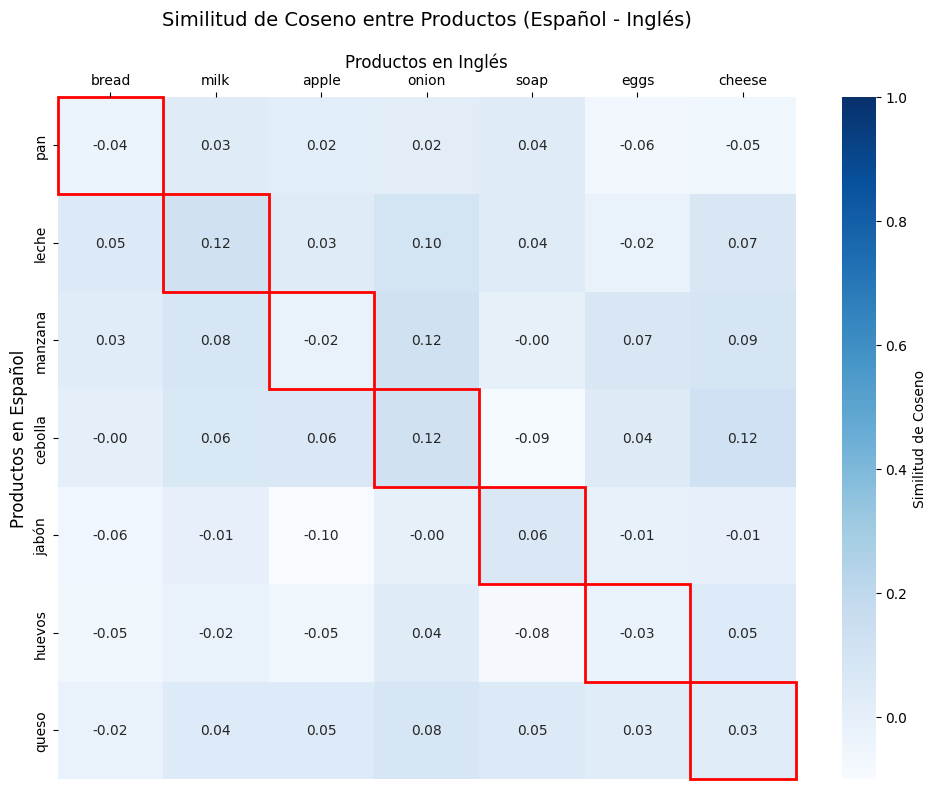


üèÜ MEJORES COINCIDENCIAS POR PRODUCTO
  'pan' ‚Üí 'soap' (similitud: 0.0374) ‚ùå INCORRECTO (deber√≠a ser 'bread')
    Interpretaci√≥n: Similitud muy baja o nula
  'leche' ‚Üí 'milk' (similitud: 0.1158) ‚úÖ CORRECTO
    Interpretaci√≥n: Similitud muy baja o nula
  'manzana' ‚Üí 'onion' (similitud: 0.1210) ‚ùå INCORRECTO (deber√≠a ser 'apple')
    Interpretaci√≥n: Similitud muy baja o nula
  'cebolla' ‚Üí 'cheese' (similitud: 0.1242) ‚ùå INCORRECTO (deber√≠a ser 'onion')
    Interpretaci√≥n: Similitud muy baja o nula
  'jab√≥n' ‚Üí 'soap' (similitud: 0.0632) ‚úÖ CORRECTO
    Interpretaci√≥n: Similitud muy baja o nula
  'huevos' ‚Üí 'cheese' (similitud: 0.0450) ‚ùå INCORRECTO (deber√≠a ser 'eggs')
    Interpretaci√≥n: Similitud muy baja o nula
  'queso' ‚Üí 'onion' (similitud: 0.0807) ‚ùå INCORRECTO (deber√≠a ser 'cheese')
    Interpretaci√≥n: Similitud muy baja o nula

üìà Precisi√≥n del modelo: 28.6% (2/7 aciertos)

üìê EXPLICACI√ìN: SIMILITUD DE COSENO
La similitud de coseno mide

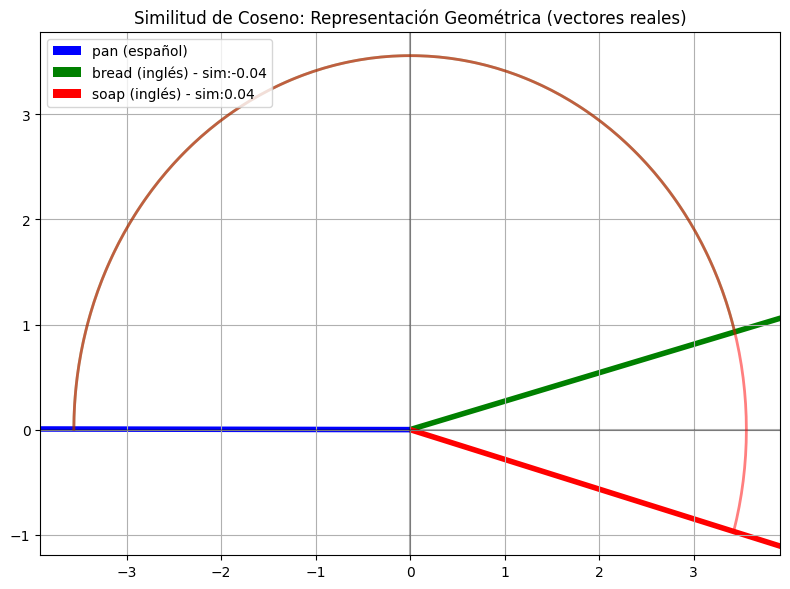


F√ìRMULA MATEM√ÅTICA:
  similitud_coseno(A, B) = (A¬∑B) / (|A| √ó |B|)
Donde:
  ‚Ä¢ A¬∑B es el producto punto de los vectores
  ‚Ä¢ |A| y |B| son las magnitudes (normas) de los vectores

Ejemplo con vectores reales:
  ‚Ä¢ Producto punto de 'pan' y 'bread': -15.6168
  ‚Ä¢ Magnitud de 'pan': 51.9002
  ‚Ä¢ Magnitud de 'bread': 7.6116
  ‚Ä¢ Similitud de coseno: -0.0395

Comparaci√≥n con vector no relacionado:
  ‚Ä¢ Similitud entre 'pan' y 'soap': 0.0374

‚ö†Ô∏è LIMITACIONES DE LOS MODELOS UTILIZADOS
Es importante destacar que los modelos es_core_news_md y en_core_web_md
no est√°n espec√≠ficamente alineados para tareas multiling√ºes. Para obtener
mejores resultados en la comparaci√≥n entre idiomas, se recomienda:
  1. Utilizar modelos espec√≠ficamente entrenados para embeddings multiling√ºes como:
     - MUSE (Multilingual Universal Sentence Encoder)
     - XLM-R (RoBERTa multiling√ºe)
     - LaBSE (Language-agnostic BERT Sentence Embeddings)
  2. Considerar t√©cnicas de alineamiento de es

In [5]:
"""
EJERCICIO DE SIMILITUD SEM√ÅNTICA MULTILING√úE: PRODUCTOS DE SUPERMERCADO üõí

Este script demuestra el proceso completo de NLP comparando productos de supermercado
en espa√±ol e ingl√©s, mostrando c√≥mo los embeddings capturan similitudes sem√°nticas
a trav√©s de diferentes idiomas.
"""

# ====================== IMPORTACI√ìN DE BIBLIOTECAS ======================
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA  # Para reducci√≥n de dimensionalidad

# ====================== DEFINICI√ìN DE FUNCIONES ======================

def procesar_palabra(palabra, nlp, mostrar_detalles=True):
    """
    Realiza el proceso completo de NLP en una palabra:
    1. Tokenizaci√≥n ‚úÇÔ∏è
    2. Normalizaci√≥n üßπ
    3. Vectorizaci√≥n üî¢
    """
    # PASO 1: TOKENIZACI√ìN ‚úÇÔ∏è
    # Procesamos la palabra con SpaCy
    doc = nlp(palabra.lower())  # Convertimos a min√∫sculas para mejorar resultados

    if mostrar_detalles:
        print(f"\nüîç Analizando: '{palabra}'")

        # Mostramos los tokens
        print(f"  ‚úÇÔ∏è Tokenizaci√≥n:")
        for token in doc:
            print(f"    - Token: '{token.text}'")

        # PASO 2: NORMALIZACI√ìN üßπ
        print(f"  üßπ Normalizaci√≥n:")
        for token in doc:
            print(f"    - Original: '{token.text}'")
            print(f"    - Min√∫sculas: '{token.text.lower()}'")
            print(f"    - Lema: '{token.lemma_}'")

        # PASO 3: VECTORIZACI√ìN üî¢
        print(f"  üî¢ Vectorizaci√≥n:")
        print(f"    - Dimensiones del vector: {doc.vector.shape}")

        # Mostramos una peque√±a muestra del vector
        print(f"    - Muestra del vector: {doc.vector[:5]}...")

    # Devolvemos el vector y el documento procesado
    return doc.vector, doc

def calcular_similitud_productos(productos_es, productos_en, traducciones, nlp_es, nlp_en):
    """
    Calcula y visualiza la matriz de similitud entre productos en espa√±ol e ingl√©s.

    Args:
        productos_es: Lista de productos en espa√±ol
        productos_en: Lista de productos en ingl√©s
        traducciones: Diccionario con las traducciones correctas
        nlp_es: Modelo de spaCy para espa√±ol
        nlp_en: Modelo de spaCy para ingl√©s
    """
    # Matrices para almacenar vectores y similitudes
    vectores_es = []
    vectores_en = []
    matriz_similitud = np.zeros((len(productos_es), len(productos_en)))

    # Procesamos cada producto en espa√±ol
    print("\nüîÑ PROCESANDO PRODUCTOS EN ESPA√ëOL")
    for producto in productos_es:
        vector, _ = procesar_palabra(producto, nlp_es, mostrar_detalles=True)
        vectores_es.append(vector)

    # Procesamos cada producto en ingl√©s
    print("\nüîÑ PROCESANDO PRODUCTOS EN INGL√âS")
    for producto in productos_en:
        vector, _ = procesar_palabra(producto, nlp_en, mostrar_detalles=True)
        vectores_en.append(vector)

    # Calculamos la similitud de coseno entre cada par de productos
    print("\nüìä CALCULANDO MATRIZ DE SIMILITUD")
    for i, vec_es in enumerate(vectores_es):
        for j, vec_en in enumerate(vectores_en):
            # Preparamos los vectores para calcular similitud de coseno
            vec_es_reshaped = vec_es.reshape(1, -1)
            vec_en_reshaped = vec_en.reshape(1, -1)

            # F√ìRMULA DE SIMILITUD DE COSENO: cos(Œ∏) = (A¬∑B)/(|A|¬∑|B|)
            sim = cosine_similarity(vec_es_reshaped, vec_en_reshaped)[0][0]
            matriz_similitud[i, j] = sim

            # Destacamos si es la traducci√≥n correcta
            es_traduccion = productos_en[j] == traducciones[productos_es[i]]
            destacado = "‚úì" if es_traduccion else ""

            print(f"  Similitud entre '{productos_es[i]}' y '{productos_en[j]}': {sim:.4f} {destacado}")

    # Visualizamos la matriz de similitud
    visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones)

    # Encontramos las mejores coincidencias
    encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones)

    # Almacenar los resultados para usar en la visualizaci√≥n
    return matriz_similitud, vectores_es, vectores_en

def visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Visualiza la matriz de similitud entre productos como un mapa de calor.
    """
    plt.figure(figsize=(10, 8))

    # Creamos el mapa de calor con etiquetas arriba
    ax = sns.heatmap(
        matriz_similitud,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=productos_en,
        yticklabels=productos_es,
        vmin=-0.1,
        vmax=1,
        cbar_kws={'label': 'Similitud de Coseno'}
    )

    # Colocamos las etiquetas de columnas (productos ingleses) en la parte superior
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # A√±adimos un marcador para las traducciones correctas
    # Creamos un diccionario inverso para encontrar √≠ndices
    indices_en = {prod: i for i, prod in enumerate(productos_en)}

    for i, prod_es in enumerate(productos_es):
        traduccion = traducciones[prod_es]
        j = indices_en[traduccion]

        # Dibujamos un rect√°ngulo alrededor de la traducci√≥n correcta
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False,
                                 edgecolor='red', lw=2, clip_on=False))

    plt.title("Similitud de Coseno entre Productos (Espa√±ol - Ingl√©s)", fontsize=14, pad=20)
    plt.xlabel("Productos en Ingl√©s", fontsize=12)
    plt.ylabel("Productos en Espa√±ol", fontsize=12)
    plt.tight_layout()
    plt.show()

def encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Encuentra y muestra las mejores coincidencias entre productos.
    """
    print("\nüèÜ MEJORES COINCIDENCIAS POR PRODUCTO")

    # Contamos cu√°ntas veces acertamos la traducci√≥n correcta
    aciertos = 0

    for i, producto_es in enumerate(productos_es):
        # Encontramos el producto ingl√©s con mayor similitud
        mejor_indice = np.argmax(matriz_similitud[i])
        mejor_similitud = matriz_similitud[i, mejor_indice]
        mejor_producto_en = productos_en[mejor_indice]

        # Verificamos si es la traducci√≥n correcta
        traduccion_correcta = traducciones[producto_es]
        es_correcta = mejor_producto_en == traduccion_correcta

        if es_correcta:
            aciertos += 1
            resultado = "‚úÖ CORRECTO"
        else:
            resultado = f"‚ùå INCORRECTO (deber√≠a ser '{traduccion_correcta}')"

        print(f"  '{producto_es}' ‚Üí '{mejor_producto_en}' (similitud: {mejor_similitud:.4f}) {resultado}")

        # Interpretamos la similitud
        if mejor_similitud > 0.7:
            interpretacion = "Alta similitud sem√°ntica"
        elif mejor_similitud > 0.4:
            interpretacion = "Similitud sem√°ntica moderada"
        elif mejor_similitud > 0.2:
            interpretacion = "Baja similitud sem√°ntica"
        else:
            interpretacion = "Similitud muy baja o nula"

        print(f"    Interpretaci√≥n: {interpretacion}")

    # Mostramos la precisi√≥n general del modelo
    precision = aciertos / len(productos_es) * 100
    print(f"\nüìà Precisi√≥n del modelo: {precision:.1f}% ({aciertos}/{len(productos_es)} aciertos)")

def demostrar_mejora_normalizacion(palabra_es, palabra_en, nlp_es, nlp_en):
    """
    Demuestra la importancia de la normalizaci√≥n comparando similitudes.
    """
    print("\nüß™ DEMOSTRACI√ìN: IMPORTANCIA DE LA NORMALIZACI√ìN")

    # Sin normalizaci√≥n
    doc_es_orig = nlp_es(palabra_es)
    doc_en_orig = nlp_en(palabra_en)

    # Con normalizaci√≥n (min√∫sculas)
    doc_es_norm = nlp_es(palabra_es.lower())
    doc_en_norm = nlp_en(palabra_en.lower())

    # Calculamos similitudes
    sim_orig = cosine_similarity(
        doc_es_orig.vector.reshape(1, -1),
        doc_en_orig.vector.reshape(1, -1)
    )[0][0]

    sim_norm = cosine_similarity(
        doc_es_norm.vector.reshape(1, -1),
        doc_en_norm.vector.reshape(1, -1)
    )[0][0]

    print(f"Comparando '{palabra_es}' con '{palabra_en}':")
    print(f"  ‚Ä¢ Similitud SIN normalizaci√≥n: {sim_orig:.4f}")
    print(f"  ‚Ä¢ Similitud CON normalizaci√≥n: {sim_norm:.4f}")
    print(f"  ‚Ä¢ Mejora: {(sim_norm - sim_orig):.4f} ({(sim_norm - sim_orig) / max(0.0001, abs(sim_orig)) * 100:.1f}%)")

def explicar_similitud_coseno(nlp_es, nlp_en, productos_es, productos_en, traducciones):
    """
    Explica el concepto de similitud de coseno con una visualizaci√≥n usando vectores reales.

    Args:
        nlp_es: Modelo de spaCy para espa√±ol
        nlp_en: Modelo de spaCy para ingl√©s
        productos_es: Lista de productos en espa√±ol
        productos_en: Lista de productos en ingl√©s
        traducciones: Diccionario con las traducciones correctas
    """
    print("\nüìê EXPLICACI√ìN: SIMILITUD DE COSENO")
    print("La similitud de coseno mide el √°ngulo entre dos vectores:")
    print("  ‚Ä¢ Similitud = 1: Los vectores apuntan en la misma direcci√≥n (productos id√©nticos)")
    print("  ‚Ä¢ Similitud = 0: Los vectores son perpendiculares (productos no relacionados)")
    print("  ‚Ä¢ Similitud = -1: Los vectores apuntan en direcciones opuestas (raramente ocurre)")

    # Obtener vectores reales de los modelos
    producto_es = "pan"  # Producto en espa√±ol para demostraci√≥n
    producto_en_correcto = traducciones[producto_es]  # Traducci√≥n correcta
    producto_en_no_relacionado = "soap"  # Producto no relacionado

    vec_es = nlp_es(producto_es.lower()).vector
    vec_en_correcto = nlp_en(producto_en_correcto.lower()).vector
    vec_en_no_rel = nlp_en(producto_en_no_relacionado.lower()).vector

    # Calcular similitudes reales usando los vectores completos
    sim_correcta = cosine_similarity(
        vec_es.reshape(1, -1),
        vec_en_correcto.reshape(1, -1)
    )[0][0]

    sim_no_rel = cosine_similarity(
        vec_es.reshape(1, -1),
        vec_en_no_rel.reshape(1, -1)
    )[0][0]

    # Reducir dimensionalidad para visualizaci√≥n (PCA a 2D)
    pca = PCA(n_components=2)

    # Juntar los vectores para aplicar PCA
    vectores_combinados = np.vstack([vec_es, vec_en_correcto, vec_en_no_rel])
    vectores_2d = pca.fit_transform(vectores_combinados)

    # Extraer los vectores reducidos
    vec1_2d = vectores_2d[0]  # Pan
    vec2_2d = vectores_2d[1]  # Bread
    vec3_2d = vectores_2d[2]  # Soap

    # Crear visualizaci√≥n
    plt.figure(figsize=(8, 6))
    origen = [0, 0]

    # Dibujamos los vectores en 2D
    plt.quiver(*origen, *vec1_2d, angles='xy', scale_units='xy', scale=1, color='blue',
               label=f'{producto_es} (espa√±ol)')
    plt.quiver(*origen, *vec2_2d, angles='xy', scale_units='xy', scale=1, color='green',
               label=f'{producto_en_correcto} (ingl√©s) - sim:{sim_correcta:.2f}')
    plt.quiver(*origen, *vec3_2d, angles='xy', scale_units='xy', scale=1, color='red',
               label=f'{producto_en_no_relacionado} (ingl√©s) - sim:{sim_no_rel:.2f}')

    # Configurar gr√°fico
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend(loc='upper left')
    plt.title('Similitud de Coseno: Representaci√≥n Geom√©trica (vectores reales)')

    # Calcular √°ngulos para dibujar arcos
    angulo1 = np.arctan2(vec1_2d[1], vec1_2d[0])
    angulo2 = np.arctan2(vec2_2d[1], vec2_2d[0])
    angulo3 = np.arctan2(vec3_2d[1], vec3_2d[0])

    # Dibujar arcos para mostrar √°ngulos
    radio = 0.2 * min(np.linalg.norm(vec1_2d), np.linalg.norm(vec2_2d), np.linalg.norm(vec3_2d))

    t1 = np.linspace(min(angulo1, angulo2), max(angulo1, angulo2), 100)
    plt.plot(radio * np.cos(t1), radio * np.sin(t1), 'g-', lw=2, alpha=0.5)

    t2 = np.linspace(min(angulo1, angulo3), max(angulo1, angulo3), 100)
    plt.plot(radio * np.cos(t2), radio * np.sin(t2), 'r-', lw=2, alpha=0.5)

    plt.tight_layout()
    plt.show()

    # Explicaci√≥n matem√°tica usando los vectores reales
    print("\nF√ìRMULA MATEM√ÅTICA:")
    print("  similitud_coseno(A, B) = (A¬∑B) / (|A| √ó |B|)")
    print("Donde:")
    print("  ‚Ä¢ A¬∑B es el producto punto de los vectores")
    print("  ‚Ä¢ |A| y |B| son las magnitudes (normas) de los vectores")
    print("\nEjemplo con vectores reales:")
    print(f"  ‚Ä¢ Producto punto de '{producto_es}' y '{producto_en_correcto}': {np.dot(vec_es, vec_en_correcto):.4f}")
    print(f"  ‚Ä¢ Magnitud de '{producto_es}': {np.linalg.norm(vec_es):.4f}")
    print(f"  ‚Ä¢ Magnitud de '{producto_en_correcto}': {np.linalg.norm(vec_en_correcto):.4f}")
    print(f"  ‚Ä¢ Similitud de coseno: {sim_correcta:.4f}")
    print(f"\nComparaci√≥n con vector no relacionado:")
    print(f"  ‚Ä¢ Similitud entre '{producto_es}' y '{producto_en_no_relacionado}': {sim_no_rel:.4f}")

# ====================== FUNCI√ìN PRINCIPAL ======================

def main():
    """Funci√≥n principal del programa."""
    print("üõí EJERCICIO DE SIMILITUD SEM√ÅNTICA: PRODUCTOS DE SUPERMERCADO üõí")
    print("="*80)
    print("Este ejercicio demuestra el proceso completo de NLP:")
    print("1. Tokenizaci√≥n ‚úÇÔ∏è: Dividir el texto en unidades b√°sicas")
    print("2. Normalizaci√≥n üßπ: Estandarizar el texto (min√∫sculas, lematizaci√≥n)")
    print("3. Vectorizaci√≥n üî¢: Convertir texto en representaciones num√©ricas")
    print("4. Similitud de coseno üìè: Medir la similitud sem√°ntica entre palabras en diferentes idiomas")
    print("="*80)

    # Definimos productos de supermercado en espa√±ol e ingl√©s
    productos_espanol = ["pan", "leche", "manzana", "cebolla", "jab√≥n", "huevos", "queso"]
    productos_ingles = ["bread", "milk", "apple", "onion", "soap", "eggs", "cheese"]

    # Diccionario de traducciones correctas para verificaci√≥n
    traducciones = {
        "pan": "bread",
        "leche": "milk",
        "manzana": "apple",
        "cebolla": "onion",
        "jab√≥n": "soap",
        "huevos": "eggs",
        "queso": "cheese"
    }

    # Cargamos los modelos de lenguaje de spaCy
    print("\nCargando modelos de lenguaje...")
    try:
        nlp_es = spacy.load("es_core_news_md")
        print("‚úì Modelo espa√±ol cargado")
    except OSError:
        print("! Modelo espa√±ol no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "es_core_news_md"])
        nlp_es = spacy.load("es_core_news_md")

    try:
        nlp_en = spacy.load("en_core_web_md")
        print("‚úì Modelo ingl√©s cargado")
    except OSError:
        print("! Modelo ingl√©s no encontrado. Instalando...")
        import subprocess
        subprocess.call(["python", "-m", "spacy", "download", "en_core_web_md"])
        nlp_en = spacy.load("en_core_web_md")

    # Demostramos la importancia de la normalizaci√≥n
    demostrar_mejora_normalizacion("Pan", "Bread", nlp_es, nlp_en)

    # Calculamos la similitud entre productos
    matriz_similitud, vectores_es, vectores_en = calcular_similitud_productos(
        productos_espanol,
        productos_ingles,
        traducciones,
        nlp_es,
        nlp_en
    )

    # Explicamos la similitud de coseno usando vectores reales
    explicar_similitud_coseno(nlp_es, nlp_en, productos_espanol, productos_ingles, traducciones)


    # NOTA SOBRE LIMITACIONES:
    print("\n‚ö†Ô∏è LIMITACIONES DE LOS MODELOS UTILIZADOS")
    print("Es importante destacar que los modelos es_core_news_md y en_core_web_md")
    print("no est√°n espec√≠ficamente alineados para tareas multiling√ºes. Para obtener")
    print("mejores resultados en la comparaci√≥n entre idiomas, se recomienda:")
    print("  1. Utilizar modelos espec√≠ficamente entrenados para embeddings multiling√ºes como:")
    print("     - MUSE (Multilingual Universal Sentence Encoder)")
    print("     - XLM-R (RoBERTa multiling√ºe)")
    print("     - LaBSE (Language-agnostic BERT Sentence Embeddings)")
    print("  2. Considerar t√©cnicas de alineamiento de espacios vectoriales para")
    print("     mejorar la comparabilidad entre idiomas distintos.")

# ====================== EJECUCI√ìN DEL PROGRAMA ======================

if __name__ == "__main__":
    main()

üõí EJERCICIO DE SIMILITUD SEM√ÅNTICA MULTILING√úE: PRODUCTOS DE SUPERMERCADO üõí
Este ejercicio demuestra el proceso de NLP usando embeddings multiling√ºes:
1. Normalizaci√≥n üßπ: Estandarizar el texto (min√∫sculas)
2. Vectorizaci√≥n multiling√ºe üî¢: Convertir texto a representaciones vectoriales alineadas
3. Similitud de coseno üìè: Medir la similitud sem√°ntica entre palabras en diferentes idiomas

Cargando modelo de embedding multiling√ºe...


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

‚úì Modelo LaBSE cargado

üß™ DEMOSTRACI√ìN: MEJORA CON EMBEDDINGS MULTILING√úES
Comparando 'Pan' con 'Bread' usando LaBSE:
  ‚Ä¢ Similitud: 0.7320
  ‚Ä¢ Interpretaci√≥n: Buena similitud (alineaci√≥n efectiva)
  ‚Ä¢ Los modelos multiling√ºes como LaBSE est√°n espec√≠ficamente entrenados
    para alinear t√©rminos equivalentes en diferentes idiomas.

üîÑ PROCESANDO PRODUCTOS EN ESPA√ëOL

üîç Analizando: 'pan'
  üßπ Normalizaci√≥n:
    - Original: 'pan'
    - Min√∫sculas: 'pan'
  üî¢ Vectorizaci√≥n (embedding multiling√ºe):
    - Dimensiones del vector: (768,)
    - Muestra del vector: [ 0.02440601  0.04525853 -0.04731065 -0.01215441 -0.01656226]...

üîç Analizando: 'leche'
  üßπ Normalizaci√≥n:
    - Original: 'leche'
    - Min√∫sculas: 'leche'
  üî¢ Vectorizaci√≥n (embedding multiling√ºe):
    - Dimensiones del vector: (768,)
    - Muestra del vector: [-0.02686215 -0.03336598  0.00046806 -0.05711575 -0.03514959]...

üîç Analizando: 'manzana'
  üßπ Normalizaci√≥n:
    - Origin

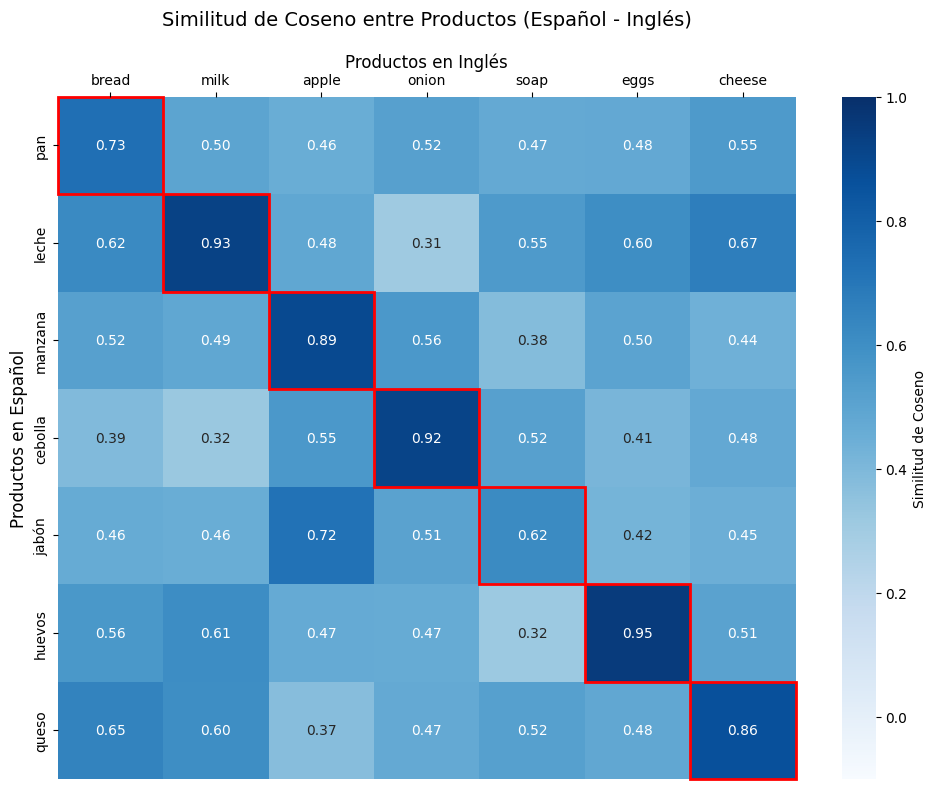


üèÜ MEJORES COINCIDENCIAS POR PRODUCTO
  'pan' ‚Üí 'bread' (similitud: 0.7320) ‚úÖ CORRECTO
    Interpretaci√≥n: Alta similitud sem√°ntica
  'leche' ‚Üí 'milk' (similitud: 0.9258) ‚úÖ CORRECTO
    Interpretaci√≥n: Alta similitud sem√°ntica
  'manzana' ‚Üí 'apple' (similitud: 0.8928) ‚úÖ CORRECTO
    Interpretaci√≥n: Alta similitud sem√°ntica
  'cebolla' ‚Üí 'onion' (similitud: 0.9170) ‚úÖ CORRECTO
    Interpretaci√≥n: Alta similitud sem√°ntica
  'jab√≥n' ‚Üí 'apple' (similitud: 0.7198) ‚ùå INCORRECTO (deber√≠a ser 'soap')
    Interpretaci√≥n: Alta similitud sem√°ntica
  'huevos' ‚Üí 'eggs' (similitud: 0.9500) ‚úÖ CORRECTO
    Interpretaci√≥n: Alta similitud sem√°ntica
  'queso' ‚Üí 'cheese' (similitud: 0.8646) ‚úÖ CORRECTO
    Interpretaci√≥n: Alta similitud sem√°ntica

üìà Precisi√≥n del modelo: 85.7% (6/7 aciertos)

üìê EXPLICACI√ìN: SIMILITUD DE COSENO CON EMBEDDINGS MULTILING√úES
La similitud de coseno mide el √°ngulo entre dos vectores:
  ‚Ä¢ Similitud = 1: Los vectores apunta

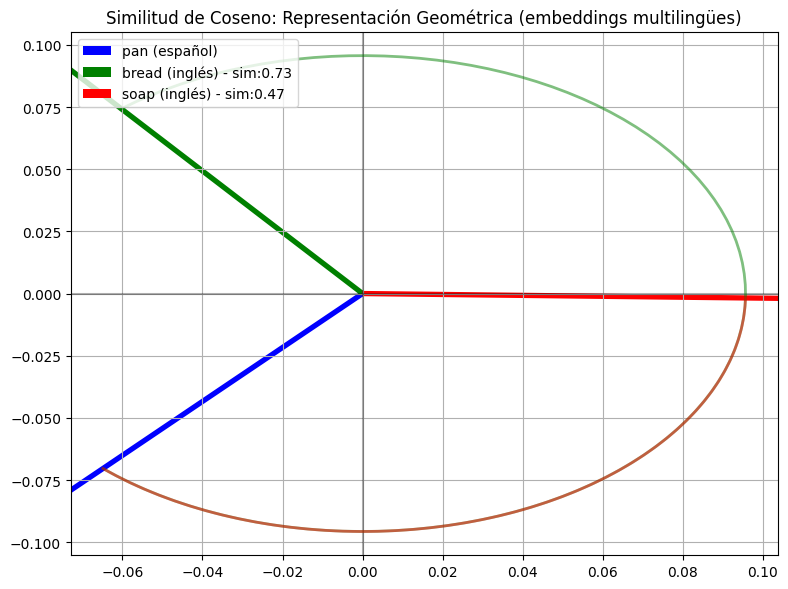


F√ìRMULA MATEM√ÅTICA:
  similitud_coseno(A, B) = (A¬∑B) / (|A| √ó |B|)
Donde:
  ‚Ä¢ A¬∑B es el producto punto de los vectores
  ‚Ä¢ |A| y |B| son las magnitudes (normas) de los vectores

Ejemplo con vectores reales:
  ‚Ä¢ Producto punto de 'pan' y 'bread': 0.7320
  ‚Ä¢ Magnitud de 'pan': 1.0000
  ‚Ä¢ Magnitud de 'bread': 1.0000
  ‚Ä¢ Similitud de coseno: 0.7320

Comparaci√≥n con vector no relacionado:
  ‚Ä¢ Similitud entre 'pan' y 'soap': 0.4739

üí° CONCLUSI√ìN
Este ejercicio muestra c√≥mo los embeddings multiling√ºes mejoran significativamente
la detecci√≥n de equivalencias sem√°nticas entre palabras de diferentes idiomas.
Observaciones importantes:
1. Los embeddings multiling√ºes (LaBSE) est√°n espec√≠ficamente entrenados para
   alinear palabras con el mismo significado en diferentes idiomas.
2. Esto se refleja en valores de similitud mucho m√°s altos para traducciones correctas.
3. La matriz de similitud ahora muestra una clara diagonal de valores altos, lo que
   indica una cor

In [6]:
"""
EJERCICIO DE SIMILITUD SEM√ÅNTICA MULTILING√úE MEJORADO: PRODUCTOS DE SUPERMERCADO üõí

Este script demuestra el proceso de NLP para comparar productos de supermercado
en espa√±ol e ingl√©s usando embeddings multiling√ºes, mostrando mejores resultados
en la captura de similitudes sem√°nticas entre diferentes idiomas.
"""

# ====================== IMPORTACI√ìN DE BIBLIOTECAS ======================
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Instalamos sentence-transformers si es necesario reiniciar
# !pip install -q sentence-transformers

# Importamos SentenceTransformer para embeddings multiling√ºes
from sentence_transformers import SentenceTransformer

# ====================== DEFINICI√ìN DE FUNCIONES ======================

def procesar_palabra(palabra, modelo, mostrar_detalles=True):
    """
    Realiza el proceso de embedding para una palabra usando un modelo multiling√ºe:
    1. Normalizaci√≥n üßπ
    2. Vectorizaci√≥n con embedding multiling√ºe üî¢
    """
    # Normalizamos la palabra (min√∫sculas)
    palabra_norm = palabra.lower()

    # Generamos el embedding
    vector = modelo.encode(palabra_norm)

    if mostrar_detalles:
        print(f"\nüîç Analizando: '{palabra}'")

        # PASO 1: NORMALIZACI√ìN üßπ
        print(f"  üßπ Normalizaci√≥n:")
        print(f"    - Original: '{palabra}'")
        print(f"    - Min√∫sculas: '{palabra_norm}'")

        # PASO 2: VECTORIZACI√ìN üî¢
        print(f"  üî¢ Vectorizaci√≥n (embedding multiling√ºe):")
        print(f"    - Dimensiones del vector: {vector.shape}")
        print(f"    - Muestra del vector: {vector[:5]}...")

    # Devolvemos el vector procesado
    return vector

def calcular_similitud_productos(productos_es, productos_en, traducciones, modelo):
    """
    Calcula y visualiza la matriz de similitud entre productos en espa√±ol e ingl√©s.

    Args:
        productos_es: Lista de productos en espa√±ol
        productos_en: Lista de productos en ingl√©s
        traducciones: Diccionario con las traducciones correctas
        modelo: Modelo de embedding multiling√ºe
    """
    # Matrices para almacenar vectores y similitudes
    vectores_es = []
    vectores_en = []
    matriz_similitud = np.zeros((len(productos_es), len(productos_en)))

    # Procesamos cada producto en espa√±ol
    print("\nüîÑ PROCESANDO PRODUCTOS EN ESPA√ëOL")
    for producto in productos_es:
        vector = procesar_palabra(producto, modelo, mostrar_detalles=True)
        vectores_es.append(vector)

    # Procesamos cada producto en ingl√©s
    print("\nüîÑ PROCESANDO PRODUCTOS EN INGL√âS")
    for producto in productos_en:
        vector = procesar_palabra(producto, modelo, mostrar_detalles=True)
        vectores_en.append(vector)

    # Calculamos la similitud de coseno entre cada par de productos
    print("\nüìä CALCULANDO MATRIZ DE SIMILITUD")
    for i, vec_es in enumerate(vectores_es):
        for j, vec_en in enumerate(vectores_en):
            # Preparamos los vectores para calcular similitud de coseno
            vec_es_reshaped = vec_es.reshape(1, -1)
            vec_en_reshaped = vec_en.reshape(1, -1)

            # F√ìRMULA DE SIMILITUD DE COSENO: cos(Œ∏) = (A¬∑B)/(|A|¬∑|B|)
            sim = cosine_similarity(vec_es_reshaped, vec_en_reshaped)[0][0]
            matriz_similitud[i, j] = sim

            # Destacamos si es la traducci√≥n correcta
            es_traduccion = productos_en[j] == traducciones[productos_es[i]]
            destacado = "‚úì" if es_traduccion else ""

            print(f"  Similitud entre '{productos_es[i]}' y '{productos_en[j]}': {sim:.4f} {destacado}")

    # Visualizamos la matriz de similitud
    visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones)

    # Encontramos las mejores coincidencias
    encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones)

    # Almacenar los resultados para usar en la visualizaci√≥n
    return matriz_similitud, vectores_es, vectores_en

def visualizar_matriz_similitud(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Visualiza la matriz de similitud entre productos como un mapa de calor.
    """
    plt.figure(figsize=(10, 8))

    # Creamos el mapa de calor con etiquetas arriba
    ax = sns.heatmap(
        matriz_similitud,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=productos_en,
        yticklabels=productos_es,
        vmin=-0.1,
        vmax=1,
        cbar_kws={'label': 'Similitud de Coseno'}
    )

    # Colocamos las etiquetas de columnas (productos ingleses) en la parte superior
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # A√±adimos un marcador para las traducciones correctas
    # Creamos un diccionario inverso para encontrar √≠ndices
    indices_en = {prod: i for i, prod in enumerate(productos_en)}

    for i, prod_es in enumerate(productos_es):
        traduccion = traducciones[prod_es]
        j = indices_en[traduccion]

        # Dibujamos un rect√°ngulo alrededor de la traducci√≥n correcta
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False,
                                 edgecolor='red', lw=2, clip_on=False))

    plt.title("Similitud de Coseno entre Productos (Espa√±ol - Ingl√©s)", fontsize=14, pad=20)
    plt.xlabel("Productos en Ingl√©s", fontsize=12)
    plt.ylabel("Productos en Espa√±ol", fontsize=12)
    plt.tight_layout()
    plt.show()

def encontrar_mejores_coincidencias(productos_es, productos_en, matriz_similitud, traducciones):
    """
    Encuentra y muestra las mejores coincidencias entre productos.
    """
    print("\nüèÜ MEJORES COINCIDENCIAS POR PRODUCTO")

    # Contamos cu√°ntas veces acertamos la traducci√≥n correcta
    aciertos = 0

    for i, producto_es in enumerate(productos_es):
        # Encontramos el producto ingl√©s con mayor similitud
        mejor_indice = np.argmax(matriz_similitud[i])
        mejor_similitud = matriz_similitud[i, mejor_indice]
        mejor_producto_en = productos_en[mejor_indice]

        # Verificamos si es la traducci√≥n correcta
        traduccion_correcta = traducciones[producto_es]
        es_correcta = mejor_producto_en == traduccion_correcta

        if es_correcta:
            aciertos += 1
            resultado = "‚úÖ CORRECTO"
        else:
            resultado = f"‚ùå INCORRECTO (deber√≠a ser '{traduccion_correcta}')"

        print(f"  '{producto_es}' ‚Üí '{mejor_producto_en}' (similitud: {mejor_similitud:.4f}) {resultado}")

        # Interpretamos la similitud
        if mejor_similitud > 0.7:
            interpretacion = "Alta similitud sem√°ntica"
        elif mejor_similitud > 0.4:
            interpretacion = "Similitud sem√°ntica moderada"
        elif mejor_similitud > 0.2:
            interpretacion = "Baja similitud sem√°ntica"
        else:
            interpretacion = "Similitud muy baja o nula"

        print(f"    Interpretaci√≥n: {interpretacion}")

    # Mostramos la precisi√≥n general del modelo
    precision = aciertos / len(productos_es) * 100
    print(f"\nüìà Precisi√≥n del modelo: {precision:.1f}% ({aciertos}/{len(productos_es)} aciertos)")

def demostrar_mejora_modelos(palabra_es, palabra_en, modelo):
    """
    Demuestra la mejora usando embeddings multiling√ºes.
    """
    print("\nüß™ DEMOSTRACI√ìN: MEJORA CON EMBEDDINGS MULTILING√úES")

    # Generamos embeddings con el modelo multiling√ºe
    vector_es = modelo.encode(palabra_es.lower())
    vector_en = modelo.encode(palabra_en.lower())

    # Calculamos similitud
    sim = cosine_similarity(
        vector_es.reshape(1, -1),
        vector_en.reshape(1, -1)
    )[0][0]

    print(f"Comparando '{palabra_es}' con '{palabra_en}' usando LaBSE:")
    print(f"  ‚Ä¢ Similitud: {sim:.4f}")

    if sim > 0.8:
        interpretacion = "Alta similitud (excelente alineaci√≥n multiling√ºe)"
    elif sim > 0.6:
        interpretacion = "Buena similitud (alineaci√≥n efectiva)"
    elif sim > 0.4:
        interpretacion = "Similitud moderada"
    else:
        interpretacion = "Baja similitud (posible falta de alineaci√≥n)"

    print(f"  ‚Ä¢ Interpretaci√≥n: {interpretacion}")
    print(f"  ‚Ä¢ Los modelos multiling√ºes como LaBSE est√°n espec√≠ficamente entrenados")
    print(f"    para alinear t√©rminos equivalentes en diferentes idiomas.")

def explicar_similitud_coseno(modelo, productos_es, productos_en, traducciones):
    """
    Explica el concepto de similitud de coseno con una visualizaci√≥n usando vectores reales.

    Args:
        modelo: Modelo de embedding multiling√ºe
        productos_es: Lista de productos en espa√±ol
        productos_en: Lista de productos en ingl√©s
        traducciones: Diccionario con las traducciones correctas
    """
    print("\nüìê EXPLICACI√ìN: SIMILITUD DE COSENO CON EMBEDDINGS MULTILING√úES")
    print("La similitud de coseno mide el √°ngulo entre dos vectores:")
    print("  ‚Ä¢ Similitud = 1: Los vectores apuntan en la misma direcci√≥n (productos id√©nticos)")
    print("  ‚Ä¢ Similitud = 0: Los vectores son perpendiculares (productos no relacionados)")
    print("  ‚Ä¢ Similitud = -1: Los vectores apuntan en direcciones opuestas (raramente ocurre)")

    # Obtener vectores reales de los modelos
    producto_es = "pan"  # Producto en espa√±ol para demostraci√≥n
    producto_en_correcto = traducciones[producto_es]  # Traducci√≥n correcta
    producto_en_no_relacionado = "soap"  # Producto no relacionado

    vec_es = modelo.encode(producto_es.lower())
    vec_en_correcto = modelo.encode(producto_en_correcto.lower())
    vec_en_no_rel = modelo.encode(producto_en_no_relacionado.lower())

    # Calcular similitudes reales usando los vectores completos
    sim_correcta = cosine_similarity(
        vec_es.reshape(1, -1),
        vec_en_correcto.reshape(1, -1)
    )[0][0]

    sim_no_rel = cosine_similarity(
        vec_es.reshape(1, -1),
        vec_en_no_rel.reshape(1, -1)
    )[0][0]

    # Reducir dimensionalidad para visualizaci√≥n (PCA a 2D)
    pca = PCA(n_components=2)

    # Juntar los vectores para aplicar PCA
    vectores_combinados = np.vstack([vec_es, vec_en_correcto, vec_en_no_rel])
    vectores_2d = pca.fit_transform(vectores_combinados)

    # Extraer los vectores reducidos
    vec1_2d = vectores_2d[0]  # Pan
    vec2_2d = vectores_2d[1]  # Bread
    vec3_2d = vectores_2d[2]  # Soap

    # Crear visualizaci√≥n
    plt.figure(figsize=(8, 6))
    origen = [0, 0]

    # Dibujamos los vectores en 2D
    plt.quiver(*origen, *vec1_2d, angles='xy', scale_units='xy', scale=1, color='blue',
               label=f'{producto_es} (espa√±ol)')
    plt.quiver(*origen, *vec2_2d, angles='xy', scale_units='xy', scale=1, color='green',
               label=f'{producto_en_correcto} (ingl√©s) - sim:{sim_correcta:.2f}')
    plt.quiver(*origen, *vec3_2d, angles='xy', scale_units='xy', scale=1, color='red',
               label=f'{producto_en_no_relacionado} (ingl√©s) - sim:{sim_no_rel:.2f}')

    # Configurar gr√°fico
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend(loc='upper left')
    plt.title('Similitud de Coseno: Representaci√≥n Geom√©trica (embeddings multiling√ºes)')

    # Calcular √°ngulos para dibujar arcos
    angulo1 = np.arctan2(vec1_2d[1], vec1_2d[0])
    angulo2 = np.arctan2(vec2_2d[1], vec2_2d[0])
    angulo3 = np.arctan2(vec3_2d[1], vec3_2d[0])

    # Dibujar arcos para mostrar √°ngulos
    radio = 0.2 * min(np.linalg.norm(vec1_2d), np.linalg.norm(vec2_2d), np.linalg.norm(vec3_2d))

    t1 = np.linspace(min(angulo1, angulo2), max(angulo1, angulo2), 100)
    plt.plot(radio * np.cos(t1), radio * np.sin(t1), 'g-', lw=2, alpha=0.5)

    t2 = np.linspace(min(angulo1, angulo3), max(angulo1, angulo3), 100)
    plt.plot(radio * np.cos(t2), radio * np.sin(t2), 'r-', lw=2, alpha=0.5)

    plt.tight_layout()
    plt.show()

    # Explicaci√≥n matem√°tica usando los vectores reales
    print("\nF√ìRMULA MATEM√ÅTICA:")
    print("  similitud_coseno(A, B) = (A¬∑B) / (|A| √ó |B|)")
    print("Donde:")
    print("  ‚Ä¢ A¬∑B es el producto punto de los vectores")
    print("  ‚Ä¢ |A| y |B| son las magnitudes (normas) de los vectores")
    print("\nEjemplo con vectores reales:")
    print(f"  ‚Ä¢ Producto punto de '{producto_es}' y '{producto_en_correcto}': {np.dot(vec_es, vec_en_correcto):.4f}")
    print(f"  ‚Ä¢ Magnitud de '{producto_es}': {np.linalg.norm(vec_es):.4f}")
    print(f"  ‚Ä¢ Magnitud de '{producto_en_correcto}': {np.linalg.norm(vec_en_correcto):.4f}")
    print(f"  ‚Ä¢ Similitud de coseno: {sim_correcta:.4f}")
    print(f"\nComparaci√≥n con vector no relacionado:")
    print(f"  ‚Ä¢ Similitud entre '{producto_es}' y '{producto_en_no_relacionado}': {sim_no_rel:.4f}")

# ====================== FUNCI√ìN PRINCIPAL ======================

def main():
    """Funci√≥n principal del programa."""
    print("üõí EJERCICIO DE SIMILITUD SEM√ÅNTICA MULTILING√úE: PRODUCTOS DE SUPERMERCADO üõí")
    print("="*80)
    print("Este ejercicio demuestra el proceso de NLP usando embeddings multiling√ºes:")
    print("1. Normalizaci√≥n üßπ: Estandarizar el texto (min√∫sculas)")
    print("2. Vectorizaci√≥n multiling√ºe üî¢: Convertir texto a representaciones vectoriales alineadas")
    print("3. Similitud de coseno üìè: Medir la similitud sem√°ntica entre palabras en diferentes idiomas")
    print("="*80)

    # Definimos productos de supermercado en espa√±ol e ingl√©s
    productos_espanol = ["pan", "leche", "manzana", "cebolla", "jab√≥n", "huevos", "queso"]
    productos_ingles = ["bread", "milk", "apple", "onion", "soap", "eggs", "cheese"]

    # Diccionario de traducciones correctas para verificaci√≥n
    traducciones = {
        "pan": "bread",
        "leche": "milk",
        "manzana": "apple",
        "cebolla": "onion",
        "jab√≥n": "soap",
        "huevos": "eggs",
        "queso": "cheese"
    }

    # Cargamos el modelo de embedding multiling√ºe
    print("\nCargando modelo de embedding multiling√ºe...")
    try:
        # Cargamos el modelo LaBSE (Language-agnostic BERT Sentence Encoder)
        # Este modelo est√° espec√≠ficamente dise√±ado para similitud sem√°ntica entre idiomas
        modelo = SentenceTransformer('sentence-transformers/LaBSE')
        print("‚úì Modelo LaBSE cargado")
    except Exception as e:
        print(f"! Error al cargar el modelo: {e}")
        print("Aseg√∫rate de tener instalada la biblioteca 'sentence-transformers':")
        print("!pip install -q sentence-transformers")
        return

    # Demostramos la mejora usando embeddings multiling√ºes
    demostrar_mejora_modelos("Pan", "Bread", modelo)

    # Calculamos la similitud entre productos
    matriz_similitud, vectores_es, vectores_en = calcular_similitud_productos(
        productos_espanol,
        productos_ingles,
        traducciones,
        modelo
    )

    # Explicamos la similitud de coseno usando vectores reales
    explicar_similitud_coseno(modelo, productos_espanol, productos_ingles, traducciones)

    print("\nüí° CONCLUSI√ìN")
    print("Este ejercicio muestra c√≥mo los embeddings multiling√ºes mejoran significativamente")
    print("la detecci√≥n de equivalencias sem√°nticas entre palabras de diferentes idiomas.")
    print("Observaciones importantes:")
    print("1. Los embeddings multiling√ºes (LaBSE) est√°n espec√≠ficamente entrenados para")
    print("   alinear palabras con el mismo significado en diferentes idiomas.")
    print("2. Esto se refleja en valores de similitud mucho m√°s altos para traducciones correctas.")
    print("3. La matriz de similitud ahora muestra una clara diagonal de valores altos, lo que")
    print("   indica una correcta identificaci√≥n de productos equivalentes.")
    print("4. Esta tecnolog√≠a es fundamental en aplicaciones modernas de PLN como:")
    print("   - B√∫squeda y recuperaci√≥n de informaci√≥n multiling√ºe")
    print("   - Sistemas de recomendaci√≥n internacionales")
    print("   - Traducci√≥n autom√°tica de alta calidad")
    print("   - Asistentes virtuales multiling√ºes")

# ====================== EJECUCI√ìN DEL PROGRAMA ======================

if __name__ == "__main__":
    main()